# Data Mining project - EDA <br>

`[Students details]`

Student Name - Diogo Melo <br>
Student id - 20240698 <br>
Contact e-mail - 20240698@novaims.unl.pt <br>

Student Name - Gonçalo Varanda <br>
Student id - 20240691 <br>
Contact e-mail - 20240691@novaims.unl.pt <br>

Student Name - Hugo Trigueiro <br>
Student id - 20240577 <br>
Contact e-mail - 20240577@novaims.unl.pt <br>

Student Name - João Sampaio <br>
Student id - 20240748 <br>
Contact e-mail - 20240748@novaims.unl.pt <br>

## Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from math import ceil
from collections import Counter

from sklearn.metrics import silhouette_score
from scipy.stats import zscore
from sklearn.cluster import KMeans, AgglomerativeClustering,MeanShift, estimate_bandwidth, DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors

from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
# see all columns when calling df
pd.set_option('display.max_columns', None)

## Initial Metadata <br>
`customer_id` - Unique identifier for each customer. <br>
`customer_region` - Geographic region where the customer is located. <br>
`customer_age` - Age of the customer. <br>
`vendor_count` - Number of unique vendors the customer has ordered from. <br>
`product_count` - Total number of products the customer has ordered. <br>
`is_chain` - Indicates whether the customer’s order was from a chain restaurant. <br>
`first_order` - Number of days from the start of the dataset when the customer first placed an order. <br>
`last_order` - Number of days from the start of the dataset when the customer most recently placed an order. <br>
`last_promo` - The category of the promotion or discount most recently used by the customer. <br>
`payment_method` - Method most recently used by the customer to pay for their orders. <br>
`CUI´s` - The amount in monetary units spent by the customer from the indicated type of cuisine. <br>
`DOW´s` - Number of orders placed on each day of the week (0 =Sunday, 6 =Saturday). <br>
`HR´s` - Number of orders placed during each hour of the day (0 =midnight, 23 = 11 PM). <br>

### Aditional Metadata <br>
`total_spent` - Total spent by each customer. <br>
`total_orders` - Total amount of orders by each customer. <br>
`age_category` - Age by labels. <br>
`number_orders` - Total orders by customer. <br>
`Weekdays` - Number of orders placed during the weekdays. <br>
`Weekend` - Number of orders placed during the weekend. <br>
`Western_Cuisine` - Groups similar cuisines American and Italian. <br>
`Asian_Cuisine` - Groups similar cuisines Asian, Indian, Chinese, Noodle Dishes, Japanese and Thai. <br>
`Complementary_Cuisine` - Groups similar cuisines Beverages, Desserts, Cafe, Healthy. <br>
`Other_Cuisines` - Groups similar cuisines Street Food / Snacks, Other, Chicken Dishes. <br>
`chain_frequency` - Frequency of orders from chain restaurants by labels based on the frequency. <br>
`avg_spending_order` - Average amount of money a customer spends per order. <br>
`prefered_cui_types` - Preferred type of cuisine of each customer. <br> 
`spending_intensity` - Metric that measures how much a customer spends in a given period of time . <br>
`Order_frequency` - Metric that measures how much a customer orders. <br>


### Changed Metadata <br>
`is_chain` - Indicates how many times customer’s order from a chain restaurant.


## Key statistics/characteristics of dataset

In [4]:
df_original = pd.read_csv("DM2425_ABCDEats_DATASET.csv")
df = df_original.copy()
df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### We can use the `.info()` method to get some information about the dataset we have:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

### Let´s divide numerical and categorical features and see some summary statistics: 

In [6]:
# summary statistics for numerical columns.
df.describe(include=[np.number])

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,30723.0,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.0000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,0.768096,1.431218,0.884359,0.950203,1.631153,3.233411,2.995379,0.711676,2.999913,3.913253,0.841697,0.555914,0.567486,0.591006,0.619449,0.677747,0.652973,0.704246,0.0,0.053845,0.063190,0.118759,0.101700,0.081943,0.069681,0.0768,0.131899,0.233912,0.329560,0.378167,0.314162,0.236453,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,3.657273,8.191755,5.259868,5.830590,7.443234,11.247990,10.180851,4.536457,9.768300,15.548507,4.433047,1.013601,1.044090,1.045907,1.069672,1.088122,1.069947,1.167446,0.0,0.317013,0.351498,0.500862,0.437493,0.358705,0.329461,0.3777,0.635582,0.724906,0.891161,0.959961,0.842484,0.637502,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,

In [7]:
# summary statistics for object columns.
df.describe(include="O")

,customer_id,customer_region,last_promo,payment_method
count,31888,31888,31888,31888
unique,31875,9,4,3
top,742ca068fc,8670,-,CARD
freq,2,9761,16748,20161


In [8]:
df.sum(numeric_only=True)

customer_age                 857130.00
vendor_count                  98936.00
product_count                180749.00
is_chain                      89888.00
first_order                  905107.00
last_order                  2030485.00
CUI_American                 155627.40
CUI_Asian                    317618.87
CUI_Beverages                 73362.60
CUI_Cafe                      25547.48
CUI_Chicken Dishes            24493.05
CUI_Chinese                   45638.67
CUI_Desserts                  28200.43
CUI_Healthy                   30300.07
CUI_Indian                    52014.20
CUI_Italian                  103107.00
CUI_Japanese                  95516.66
CUI_Noodle Dishes             22693.92
CUI_OTHER                     95661.23
CUI_Street Food / Snacks     124785.82
CUI_Thai                      26840.02
DOW_0                         17727.00
DOW_1                         18096.00
DOW_2                         18846.00
DOW_3                         19753.00
DOW_4                    

## Take a look at some Anomalies, Patterns, Trends: <br>

`customer_id` doesn´t look right. We should have unique IDs for each customer 

In [9]:
df["customer_id"].nunique()

31875

In [10]:
# duplicated observations
df.duplicated().sum()

13

In [11]:
# this return the customers ID that are duplicated, we can see that has the same info, so we are going to drop those.
df[df.duplicated(subset=["customer_id"], keep=False)]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
3355,b55012ee1c,8550,23.0,4,11,1,2.0,89,FREEBIE,CARD,0.00,93.43,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,3,2,3,1,1,0,0,0.0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3379,b55012ee1c,8550,23.0,4,11,1,2.0,89,FREEBIE,CARD,0.00,93.43,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,3,2,3,1,1,0,0,0.0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7867,24251eb7da,8550,28.0,4,8,3,7.0,85,-,CARD,30.44,18.54,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,32.27,0.0,1,0,3,0,0,0,1,0.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
7887,24251eb7da,8550,28.0,4,8,3,7.0,85,-,CARD,30.44,18.54,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,32.27,0.0,1,0,3,0,0,0,1,0.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
16227,671bf0c738,8550,25.0,4,7,3,23.0,66,FREEBIE,CARD,56.18,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,30.53,0.0,0,1,1,1,0,1,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
16230,671bf0c738,8550,25.0,4,7,3,23.0,66,FREEBIE,CARD,56.18,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,30.53,0.0,0,1,1,1,0,1,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
20855,742ca068fc,8550,20.0,1,2,0,35.0,35,-,CARD,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,31.57,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
20907,742ca068fc,8550,20.0,1,2,0,35.0,35,-,CARD,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,31.57,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
24328,df91183978,8550,23.0,2,3,1,47.0,52,DELIVERY,CARD,0.00,18.78,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,17.34,0.0,0,0,1,0,1,0,0,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24329,df91183978,8550,23.0,2,3,1,47.0,52,DELIVERY,CARD,0.00,18.78,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,17.34,0.0,0,0,1,0,1,0,0,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# drop the 13 duplicated rows in our df and keep the first occurence.
df.drop_duplicates(subset="customer_id", inplace=True, keep="first")

# now that we have unique ids, those our identifiers, so change for Index.
df.set_index("customer_id", drop=True, inplace=True)
df.head(2)

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
## We started by checking for any cases where the “vendor count” exceeded the “product count,” as this would indicate a logical inconsistency.
vendor_product = df["vendor_count"] > df["product_count"]

print("Before the change") 
print(vendor_product.value_counts()) # We found 18 cases where vendor_count is greater than product_count

# Observing the 18 cases we concluded that all of them had a value in CUI, meaning an order had been placed.
# Therefore we decided to update the product_count to be equal to vendor_count in these cases.

# Loop to ensure all values are updated correctly
while vendor_product.any():
    # Locate the rows where vendor_product is True and set product_count equal to vendor_count
    df.loc[vendor_product, "product_count"] = df.loc[vendor_product, "vendor_count"]
    
    # Recalculate the boolean Series
    vendor_product = df["vendor_count"] > df["product_count"]

# Check if the values are now all False and the change has been made
print("After the change")
print(vendor_product.value_counts())

Before the change
False    31857
True        18
Name: count, dtype: int64
After the change
False    31875
Name: count, dtype: int64


### How many missing values do we have? We should also look for "-" values:

In [14]:
# Sum all missing values in sort by bigger columns who was the highest ones. 
df.replace("", np.nan, inplace=True)
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data

,Missing Values,Percentage
HR_0,1164,3.651765
customer_age,727,2.280784
first_order,106,0.332549
HR_10,0,0.000000
DOW_6,0,0.000000
HR_1,0,0.000000
HR_2,0,0.000000
HR_3,0,0.000000
HR_4,0,0.000000
HR_5,0,0.000000


### Get to know some of our features: 

In [15]:
# more than 50% of observations are "-".
df["last_promo"].value_counts(normalize=True)*100

last_promo
-           52.530196
DELIVERY    19.708235
DISCOUNT    14.105098
FREEBIE     13.656471
Name: proportion, dtype: float64

### Customer age is one of the best indicators in our dataset, so let´s see how it is distributed:

In [16]:
# Customer Age distributed
df["customer_age"].describe()

count    31148.000000
mean        27.507545
std          7.161828
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         80.000000
Name: customer_age, dtype: float64

Considering data above, it looks like our customers are very concentrated between 23 and 31 years old...

### We saw early that 'customer_age' had some missing values. For now and in order to get some analysis done we will replace those missing values by the median age of each region. <br> 
*However, in 2nd part of project, we will try to predict those missing values based on certain features.*

In [17]:
# we can replace the missing age by the median of each customer_region
df.groupby(["customer_region"])[["customer_age"]].median()

,customer_age
customer_region,
-,26.0
2360,26.0
2440,26.0
2490,26.0
4140,26.0
4660,26.0
8370,26.0
8550,25.0
8670,26.0


### For now, replace missing values in "customer_age" with the median age for each customer region:

In [18]:
median_age_by_region = df.groupby("customer_region")["customer_age"].transform("median")
df["customer_age"] = df["customer_age"].fillna(median_age_by_region)

In [19]:
# after change
df["customer_age"].isna().sum()

0

## Some patterns we found regarding anomalies:

### Taking a look also at 'HR_0':

In [20]:
# The variable "HR_0" presents only one unique value, and 1164 missing values, making it irrelevant due to no variance in its values.
# At first we should drop this column, however, we digged deeper and found that the variable "HR_0" has valuable information in it, has shown in the next cell.
df["HR_0"].unique()

array([ 0., nan])

### Since we found it unusual that column HR_0 had no values we decided to run a test to confirm it: <br>
When running the test we found that there were 1164 rows where the 'test' column had values different from 0, which means that the total hours were not equal to the total days. <br>
This means that the 'HR_0' column has valuable information that was not captured in the 'total_hours' column. <br>

Therefore, we will replace the missing values in the 'HR_0' column with the corresponding values from the 'test' column.


In [21]:
# Calculate total days and total hours
total_days = df.loc[:, "DOW_0":"DOW_6"].sum(axis=1)
total_hours = df.loc[:, "HR_0":"HR_23"].sum(axis=1)


# Calculate the 'test' column to check if the sum of total hours is equal to the sum of total days
df["test"] = total_days - total_hours

print("Before the change")
print(df[df["test"] != 0]["test"].value_counts())

# We start by identifying the rows where the 'test' column has values greater than 0
conditionHR_0 = df["test"] > 0

# We replace the missing values in the 'HR_0' column with the corresponding values from the 'test' column
df.loc[conditionHR_0, "HR_0"] = df.loc[conditionHR_0, "test"]

# Recalculate 'total_hours' to reflect the changes made to 'HR_0'
total_hours = df.loc[:, "HR_0":"HR_23"].sum(axis=1)

# Recalculate 'test' after updating 'HR_0'
df["test"] = total_days - total_hours

#After the change we can see the values in the test column are all 0, meaning the values were replaced correctly in column HR_0
print("After the change")
print(df["test"].value_counts())

# Drop the 'test' column since it was created just to help us replace the missing values in the 'HR_0' column
df.drop(columns=["test"], inplace=True)

Before the change
test
1.0     934
2.0     159
3.0      39
4.0      15
5.0       8
9.0       2
6.0       2
12.0      1
8.0       1
7.0       1
11.0      1
15.0      1
Name: count, dtype: int64
After the change
test
0.0    31875
Name: count, dtype: int64


### Regarding 'first_order':

In [22]:
# There are missing values in the "first_order" column.
first_order_Nan=(df[df["first_order"].isna()])

# Looking at the data we established that the "last_order" column is should always be greater than the "first_order" column.
# Since all values missing in first order, have last_order with value 0, we can only assume first order will be zero as well

# Replace first_order nan with 0
df["first_order"].fillna(0, inplace=True)

# No missing values in the dataset column "first_order" after the change
df["first_order"].isna().any().any()


False

### Inconsistencies between 'product_count' and 'is_chain':

In [23]:
# We checked for any inconsistencies in the data by comparing the product count with the is_chain.
df["trial"] = df["product_count"] - df["is_chain"]

# We filtered the negative numbers in the 'trial' column since it doesn´t make sense that the product count is lower than the is_chain
negative_numbers = df[df["trial"] < 0]

# Count the occurrences of each negative number
negative_numbers["trial"].value_counts() # 75 rows where the product count is lower than the is_chain
negative_numbers

# After looking at data we can see that even though the is_chain column is 1, the product count and total spent are 0, so we can assume that the is_chain is wrong and should be 0.
setup = (df["is_chain"] == 1) & (df["product_count"] == 0) & (df.loc[:, "CUI_American":"CUI_Thai"].sum(axis=1) == 0)

# Replace the values in the 'is_chain' column with 0 where the condition is True
while setup.any():
    df.loc[setup, "is_chain"] = 0
    setup = (df["is_chain"] == 1) & (df["product_count"] == 0) & (df.loc[:, "CUI_American":"CUI_Thai"].sum(axis=1) == 0)

# Display the updated DataFrame
print(setup.value_counts()) # all values should be False, meaning the values were replaced correctly

# Drop the 'trial' column since we no longer need it in the Data Frame it was just an aid column
df.drop(columns=["trial"], inplace=True)

False    31875
Name: count, dtype: int64


In [24]:
#Goes trough the entire data frame to check if there are any missing values or inconsistencies in the dataset after all the transformations
df.isna().any().any() 

False

### What regions exist on our dataset and how it is distributed:

In [25]:
df["customer_region"].value_counts()
#We found that the customer_region column has 442 unknown values, later on in the project we will provide a model to predict these values.
#Based on the a correlation with CUI´s and customer_ergion we can see that probably the unknown values will be regions 8370. 8550 and 8670, due to its identical behavior.

customer_region
8670    9761
4660    9550
2360    8829
2440    1483
4140     857
8370     495
2490     445
-        442
8550      13
Name: count, dtype: int64

In visuals part, we will talk more about this very important feature. <br>
We noticed for now that the customer_region column has 442 unknown values, later on in the project we will provide a model to predict these values.


## Explore Relationships and Patterns between some features:

In [26]:
# best correlation: CUI_Chinese & CUI_Noodle Dishes / CUI_Asian & CUI_Street Food / Snacks
df.loc[:,"CUI_American":"CUI_Thai"].corr("pearson", numeric_only=True).style.background_gradient(cmap="YlOrRd") 

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai
CUI_American,1.000000,0.095386,0.006193,0.089924,-0.012515,0.007270,0.029139,0.017389,0.027328,0.090887,0.059312,-0.024337,0.089473,0.040721,0.055482
CUI_Asian,0.095386,1.000000,0.092999,0.006043,-0.055104,0.033739,0.117149,0.038322,-0.030541,-0.064356,0.085933,-0.041064,-0.041658,0.185735,-0.028058
CUI_Beverages,0.006193,0.092999,1.000000,-0.021500,0.013881,0.044321,0.077116,0.009962,-0.030264,-0.070903,0.008574,0.028697,-0.002197,0.062643,-0.020331
CUI_Cafe,0.089924,0.006043,-0.021500,1.000000,0.002074,0.010898,-0.013668,0.063357,0.052836,0.094287,0.080514,-0.006339,0.204713,-0.025078,0.092564
CUI_Chicken Dishes,-0.012515,-0.055104,0.013881,0.002074,1.000000,0.066549,-0.011440,-0.019135,0.028479,-0.014262,-0.008680,0.091565,0.087779,-0.044841,0.087759
CUI_Chinese,0.007270,0.033739,0.044321,0.010898,0.066549,1.000000,0.009707,0.002396,-0.004585,-0.003785,0.043249,0.210177,0.090882,0.003569,0.083825
CUI_Desserts,0.029139,0.117149,0.077116,-0.013668,-0.011440,0.009707,1.000000,0.012134,-0.025717,-0.045205,0.026608,-0.012811,-0.025148,0.110946,-0.024238
CUI_Healthy,0.017389,0.038322,0.009962,0.063357,-0.019135,0.002396,0.012134,1.000000,0.020063,0.003657,0.053965,-0.008757,0.067131,0.004489,0.034098
CUI_Indian,0.027328,-0.030541,-0.030264,0.052836,0.028479,-0.004585,-0.025717,0.020063,1.000000,0.057509,0.025695,-0.007695,0.089505,-0.047844,0.075642
CUI_Italian,0.090887,-0.064356,-0.070903,0.094287,-0.014262,-0.003785,-0.045205,0.003657,0.057509,1.000000,0.021265,-0.029129,0.107519,-0.056737,0.076514


Above correlation between each cuisine doesn´t tell us a lot, however we can some minimun relation between Chinese and Noodle Dishes.

### Usually, people tend to order on a certain time slot, let´s see:

In [27]:
# hours of the day corr
df.loc[:,"HR_0":"HR_23"].corr("pearson", numeric_only=True).style.background_gradient(cmap="YlOrRd") 

,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
HR_0,1.000000,0.222415,0.103803,0.054925,0.085714,0.046352,0.045037,0.036659,0.027655,0.030682,0.021634,0.025155,0.012404,0.012747,0.012089,-0.019019,-0.025949,-0.025692,-0.011903,0.002231,0.033536,0.054208,0.115944,0.277915
HR_1,0.222415,1.000000,0.246811,0.111476,0.108893,0.066333,0.065974,0.055709,0.022845,0.022733,0.028345,0.011534,0.005841,-0.002593,0.008735,-0.015888,-0.033480,-0.036282,-0.023294,-0.010896,0.007226,0.023802,0.057437,0.125793
HR_2,0.103803,0.246811,1.000000,0.220644,0.170798,0.109267,0.083175,0.060000,0.063134,0.035834,0.020468,0.001168,-0.010975,-0.015250,-0.009860,-0.030325,-0.047538,-0.047681,-0.042386,-0.028452,-0.012872,-0.011085,0.042130,0.063637
HR_3,0.054925,0.111476,0.220644,1.000000,0.281617,0.147106,0.100707,0.066709,0.031353,0.046466,0.027674,-0.011530,-0.031687,-0.030248,-0.034063,-0.058812,-0.075167,-0.085030,-0.078858,-0.063668,-0.047418,-0.030494,0.006754,0.033935
HR_4,0.085714,0.108893,0.170798,0.281617,1.000000,0.274344,0.158580,0.082928,0.041685,0.048712,0.049091,0.003486,-0.015047,-0.015688,-0.019300,-0.052290,-0.073706,-0.083321,-0.078100,-0.064226,-0.046224,-0.033893,0.007804,0.042852
HR_5,0.046352,0.066333,0.109267,0.147106,0.274344,1.000000,0.260616,0.132768,0.041519,0.042123,0.052033,0.011238,-0.007736,-0.008685,-0.014038,-0.043424,-0.060106,-0.074879,-0.072209,-0.061078,-0.042944,-0.027815,0.002620,0.015831
HR_6,0.045037,0.065974,0.083175,0.100707,0.158580,0.260616,1.000000,0.259762,0.100188,0.085398,0.068460,0.023581,-0.002300,0.011115,0.015329,-0.016507,-0.031291,-0.043076,-0.047099,-0.044096,-0.031186,-0.019392,0.008578,0.013092
HR_7,0.036659,0.055709,0.060000,0.066709,0.082928,0.132768,0.259762,1.000000,0.266814,0.115965,0.087525,0.046635,0.039167,0.049582,0.044945,0.024070,0.013168,0.004427,0.003360,-0.005377,-0.008812,0.000245,0.012541,0.021400
HR_8,0.027655,0.022845,0.063134,0.031353,0.041685,0.041519,0.100188,0.266814,1.000000,0.272581,0.142459,0.107817,0.073703,0.071411,0.060431,0.041605,0.040595,0.054564,0.053063,0.027019,0.022677,0.009035,0.013579,0.022425
HR_9,0.030682,0.022733,0.035834,0.046466,0.048712,0.042123,0.085398,0.115965,0.272581,1.000000,0.382654,0.145682,0.072851,0.077991,0.094956,0.110108,0.101378,0.085910,0.048507,0.026547,0.020699,0.015911,0.013339,0.023342


Above correlation shows that some time periods like for example, a customer who orders at 15h it´s likely that also orders at 16h indicating that the customers have similar eating habits during these time periods.


### For better readability regarding days of the week, we decided to rename right away the columns names:

In [28]:
#Rename the variables "DOW_0" to "DOW_6" to make them more readable, according to the days of the week.
df.rename(columns={"DOW_0": "Sunday", "DOW_1": "Monday", "DOW_2": "Tuesday", "DOW_3": "Wednesday", "DOW_4": "Thursday", "DOW_5": "Friday", "DOW_6": "Saturday"}, inplace=True)

### Usually people also tend to order on some specific days or time periods (weekend), let´s check:

In [29]:
# days of the week correlation
df.loc[:,"Sunday":"Saturday"].corr("pearson", numeric_only=True).style.background_gradient(cmap="YlOrRd") 

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Sunday,1.000000,0.452327,0.436638,0.431430,0.374399,0.309764,0.319959
Monday,0.452327,1.000000,0.455396,0.441509,0.389547,0.300636,0.310871
Tuesday,0.436638,0.455396,1.000000,0.440634,0.394974,0.304282,0.316791
Wednesday,0.431430,0.441509,0.440634,1.000000,0.398344,0.318192,0.322825
Thursday,0.374399,0.389547,0.394974,0.398344,1.000000,0.339392,0.329516
Friday,0.309764,0.300636,0.304282,0.318192,0.339392,1.000000,0.403610
Saturday,0.319959,0.310871,0.316791,0.322825,0.329516,0.403610,1.000000


In this particular case, it is not the strongest correlation, being overtaken by the relation between Monday and Tuesday.

## Outilers Treatment:

In [30]:
non_metric_features = df.select_dtypes(include=['object']).columns.tolist()
metric_features = df.columns.drop(non_metric_features).to_list()
selected_metric_features = ["customer_age","product_count","vendor_count", "is_chain", "first_order", "last_order"]
selected_non_metric_features = ["last_promo","payment_method", "customer_region"]


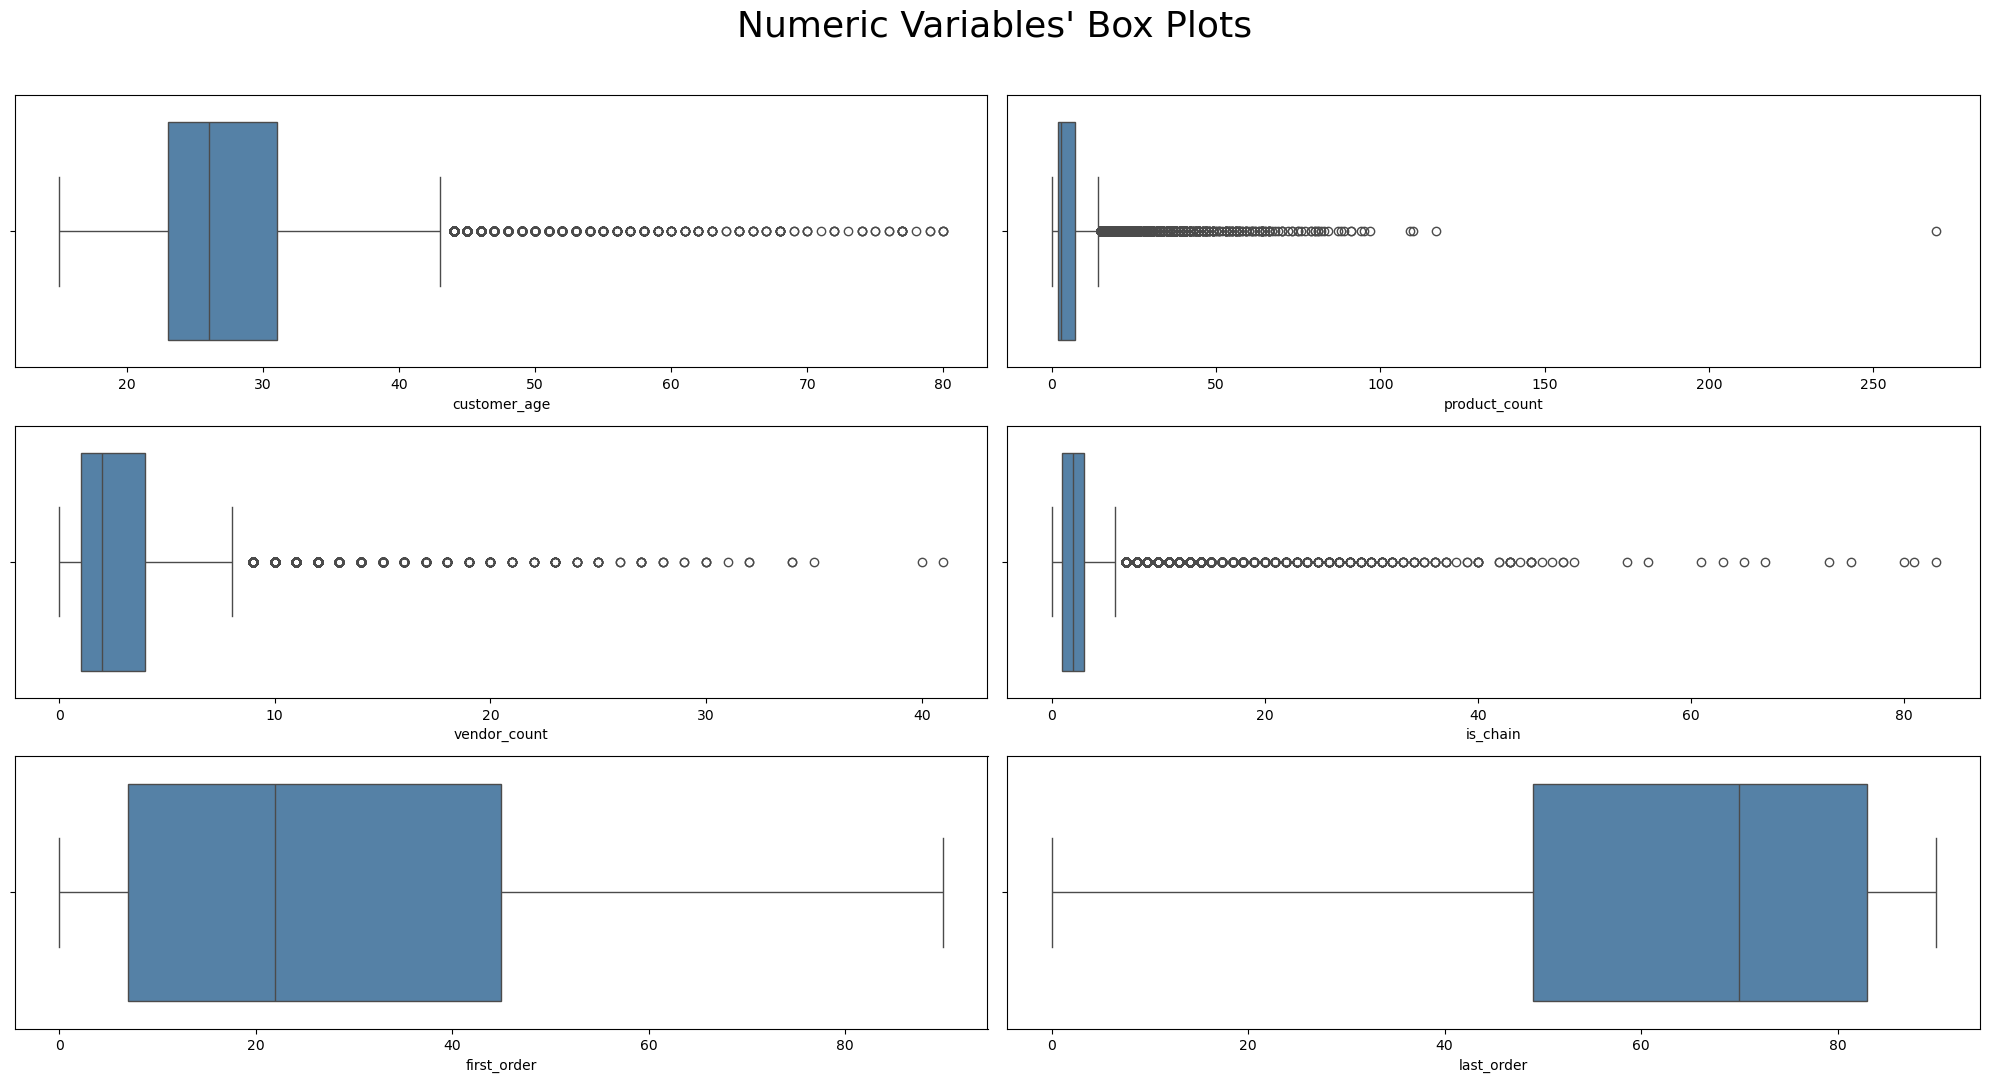

Using the IQR method, we identified outliers in the following features:
Outliers in customer_age:
Lower bound: 11.0, Upper bound: 43.0
Number of values to be removed: 1083
Outliers in product_count:
Lower bound: -5.5, Upper bound: 14.5
Number of values to be removed: 2370
Outliers in vendor_count:
Lower bound: -3.5, Upper bound: 8.5
Number of values to be removed: 1523
Outliers in is_chain:
Lower bound: -2.0, Upper bound: 6.0
Number of values to be removed: 3154

Using the Z-score method, we identified outliers in the following features:
Outliers in customer_age:
Number of values to be removed: 503
Outliers in product_count:
Number of values to be removed: 624
Outliers in vendor_count:
Number of values to be removed: 623
Outliers in is_chain:
Number of values to be removed: 604


In [31]:
# For metric features, we will use the boxplot function from the seaborn library to visualize the distribution of each metric feature.

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(selected_metric_features) / 3), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), selected_metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat], ax=ax, color='#4782B4')
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title, fontsize=26)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
plt.show()

# Identify outliers programmatically and store bounds using IQR method
outliers_iqr = {}
for feat in selected_metric_features:
    Q1 = df[feat].quantile(0.25)
    Q3 = df[feat].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr[feat] = {
        'values': df[(df[feat] < lower_bound) | (df[feat] > upper_bound)][feat],
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'count': len(df[(df[feat] < lower_bound) | (df[feat] > upper_bound)][feat])
    }

print("Using the IQR method, we identified outliers in the following features:")
# Display the outliers with bounds
for feat, data in outliers_iqr.items():
    if data['count'] > 0:
        print(f"Outliers in {feat}:")
        print(f"Lower bound: {data['lower_bound']}, Upper bound: {data['upper_bound']}")
        print(f"Number of values to be removed: {data['count']}")
        

# Identify outliers programmatically using Z-score method
outliers_zscore = {}
threshold = 3
for feat in selected_metric_features:
    z_scores = zscore(df[feat])
    outliers_zscore[feat] = {
        'values': df[(z_scores < -threshold) | (z_scores > threshold)][feat],
        'count': len(df[(z_scores < -threshold) | (z_scores > threshold)][feat])
    }

print("\nUsing the Z-score method, we identified outliers in the following features:")
# Display the outliers
for feat, data in outliers_zscore.items():
    if data['count'] > 0:
        print(f"Outliers in {feat}:")
        print(f"Number of values to be removed: {data['count']}")
    

In this case we are dealing with very sensitive data that doesn´t allow us to remove outliers (trought the quartile method) since they are real data and not errors. <br>
We also tried to use the z-score method which allowed us to get better results, however, we will not be removing this outliers in this part of the project. <br>
Further in the work we will have to work on another form of normalization, since the data is very skewed, making the outliers important for the analysis. <br>

The data shows a significant skew, with numerous outliers, particularly in the HR columns, as well as in total_spent, total_orders, product_count, is_chain, and weekdays and weekend categories. <br>
Even without removing these outliers, their impact on the dataset's distribution is noticeable


### For non-metric features, we will plot the count of each category to see how it is distributed:

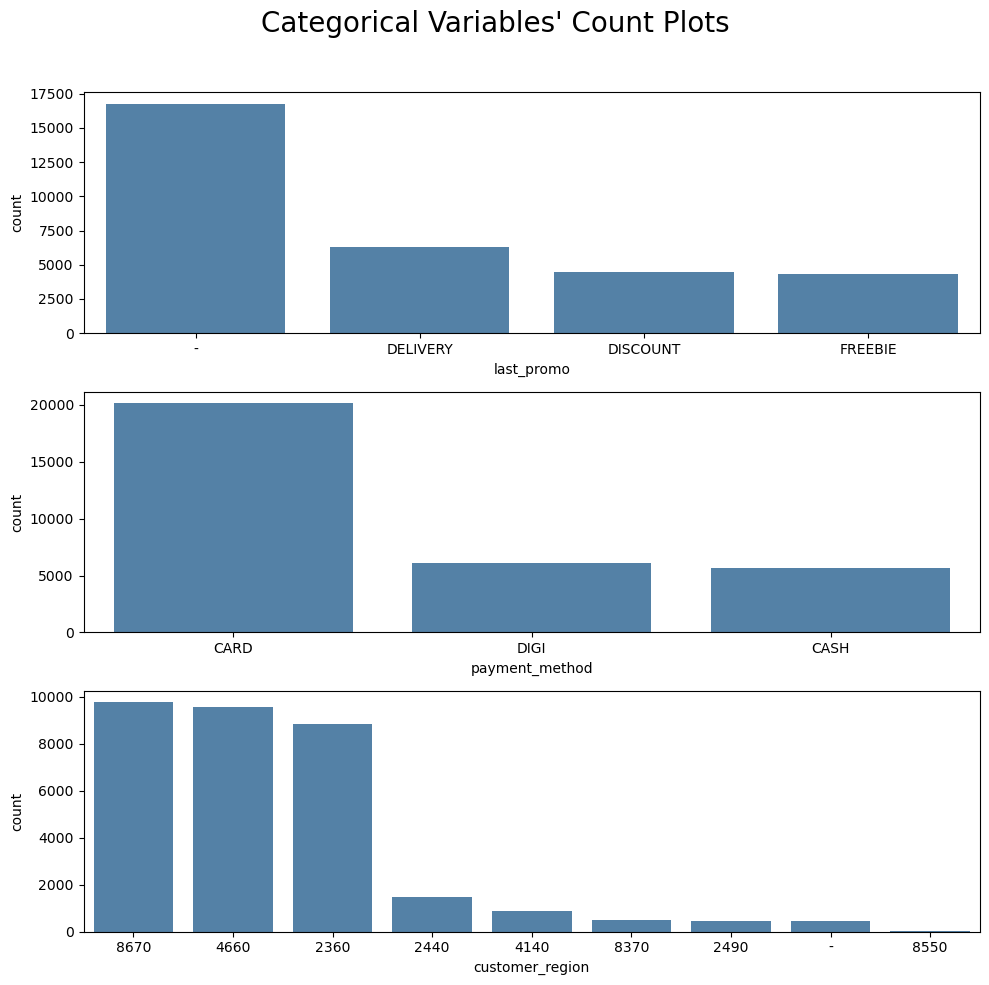

In [32]:
# Prepare figure. Create individual axes where each count plot will be placed
fig, axes = plt.subplots(3, ceil(len(selected_non_metric_features) / 3), figsize=(10, 10))

# Plot data
# Iterate across axes objects and associate each count plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), selected_non_metric_features): 
    order = df[feat].value_counts(ascending=False).index  # Order categories from smallest to largest
    sns.countplot(x=df[feat], ax=ax, color='#4682B4', order=order)    
# Layout
# Add a centered title to the figure:
title = "Categorical Variables' Count Plots"

plt.suptitle(title, fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
plt.show()

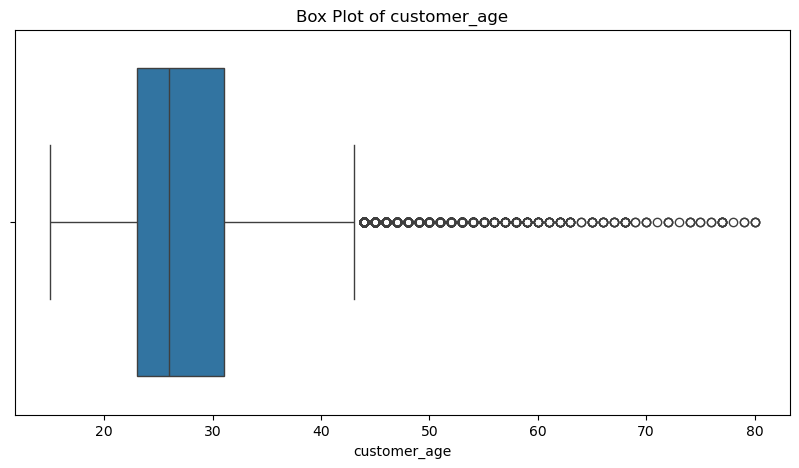

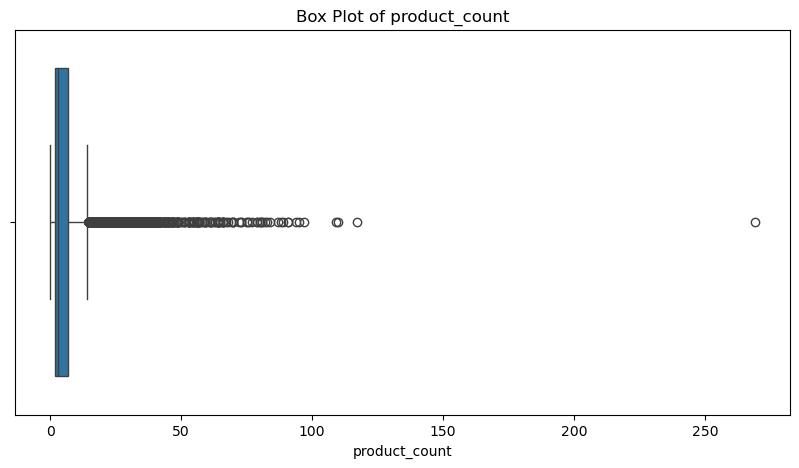

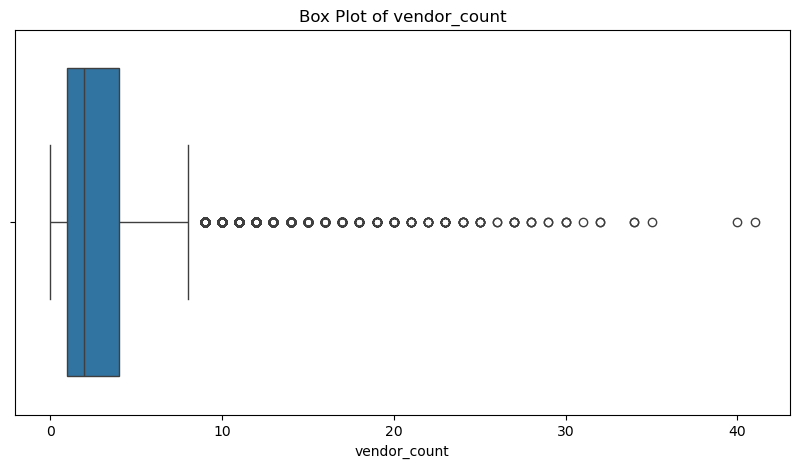

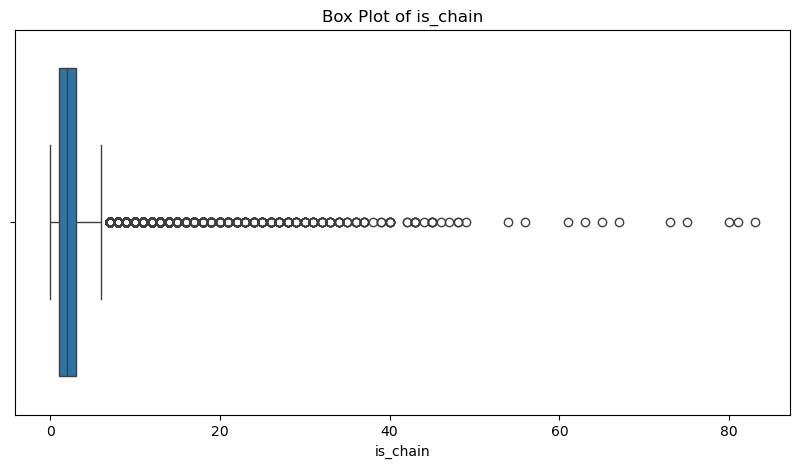

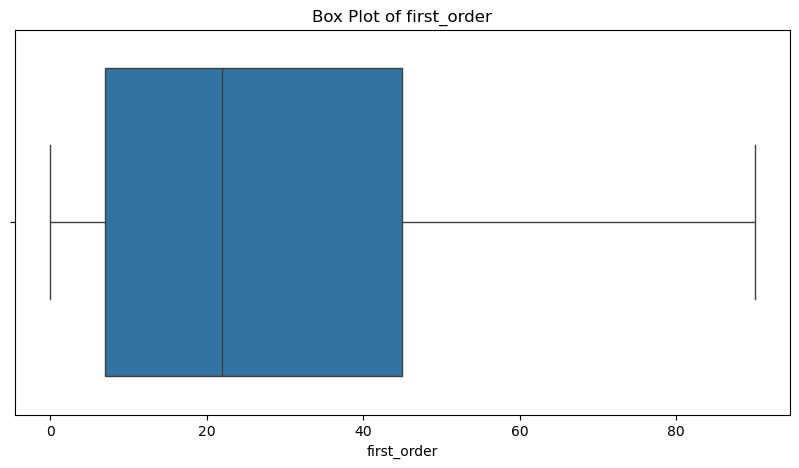

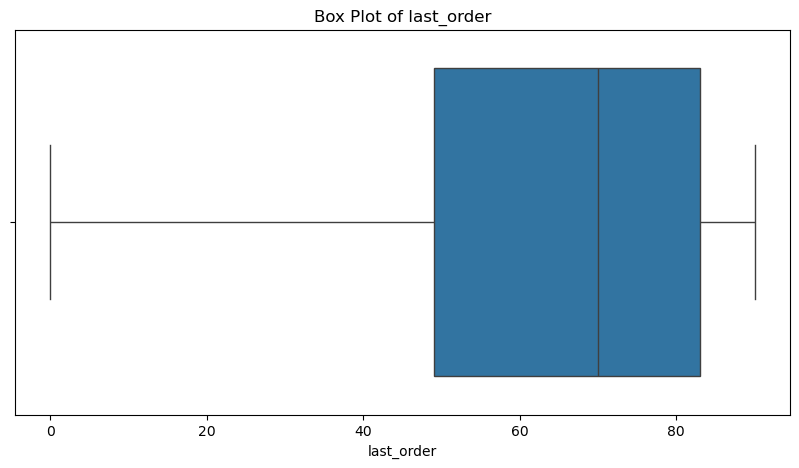

In [33]:
# Creating box plots for each metric feature
for feature in selected_metric_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()

In [34]:
# Create a copy of the DataFrame
df_outliers = df.copy()

# Remove outliers by analyzing the boxplots for the metric features
filters = (
    (df_outliers['product_count'] <= 100) &
    (df_outliers['vendor_count'] <= 35) &
    (df_outliers['is_chain'] <= 60)
)

# Apply the filters to remove outliers
df_outliers = df_outliers[filters]

# Calculate and print the percentage of data kept after removing outliers
percentage_kept = np.round(df_outliers.shape[0] / df.shape[0], 4) * 100
print('Percentage of data kept after removing outliers:', percentage_kept, '%')


Percentage of data kept after removing outliers: 99.97 %


In [35]:
df=df_outliers.copy()

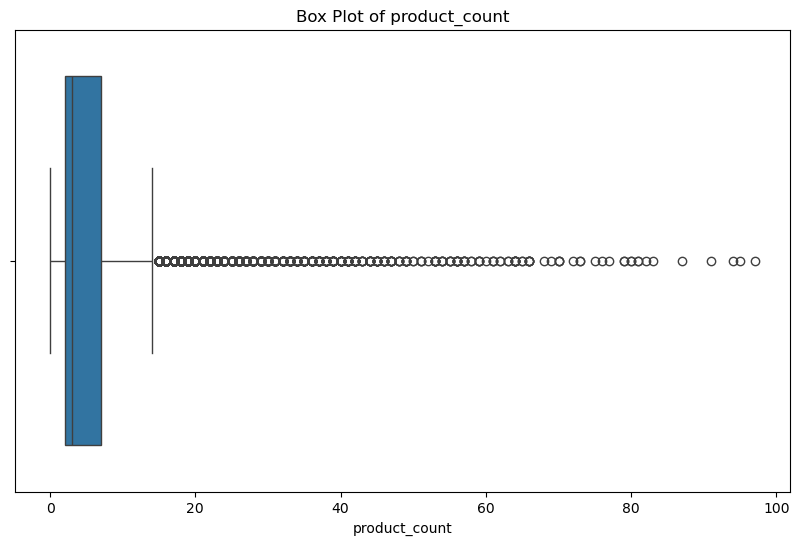

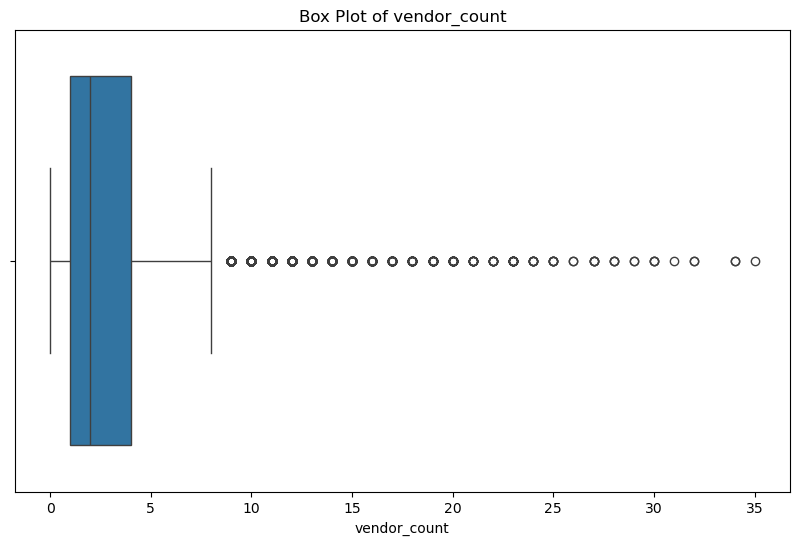

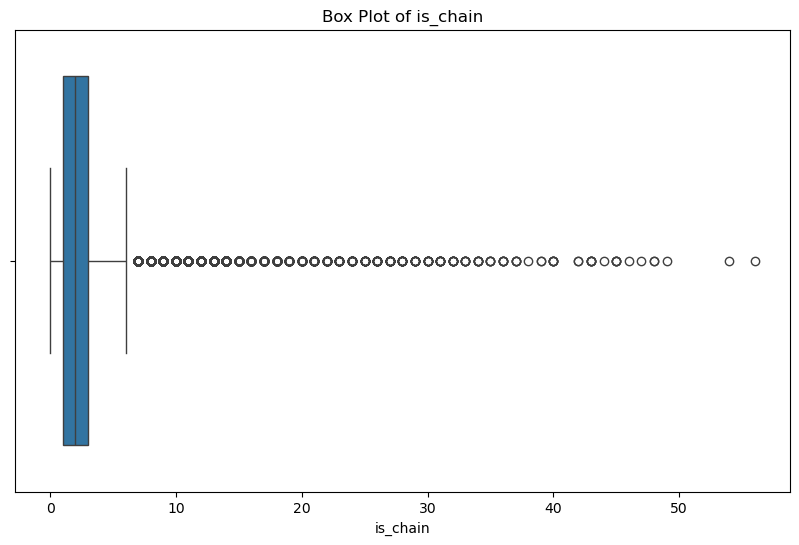

In [36]:
features_outliers = ['product_count',
                     'vendor_count',
                     'is_chain',
    
]


# Creating box plots for each metric feature
for feature in features_outliers:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()

- Only around 0.9% of the data was removed when removing outliers which is in the acceptable range of removal of data and give us margin to reduce more outliers after the feature engineering process

## Feature Engineering: <br>


### Segmenting age in groups, will allows us to see patterns that could not be seem before:

In [105]:
age_categories = ["teens", "young_adults", "mid_adults", "old_adults", "senior"]
bins = [df["customer_age"].min(),23, 30, 45, 60, df["customer_age"].max()]

# create new column that is going to retrieve a certain category based on the total population
# use the cut() to segment and sort data values into bins. We use right= so that the rightmost is included.

df["age_category"] = pd.cut(df["customer_age"], bins=bins, labels=age_categories, right=True, include_lowest=True)

df.groupby("age_category").agg({"product_count": ["mean", "std"]})

product_count          
                      mean       std
age_category                        
teens             5.532035  6.418964
young_adults      5.750367  6.771408
mid_adults        5.597813  6.352044
old_adults        5.614108  6.427880
senior            6.526316  8.362573

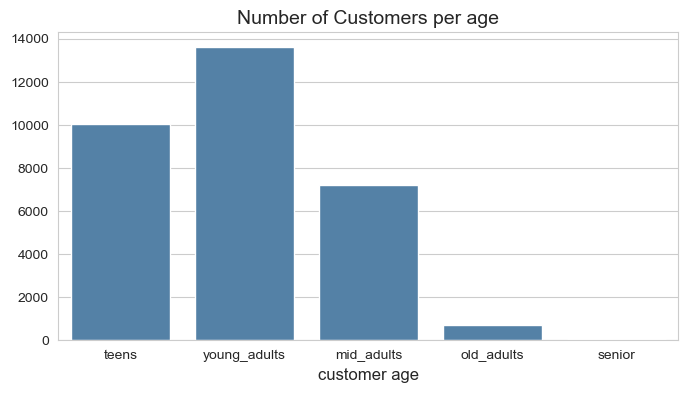

In [129]:
orderhis = ["teens", "young_adults", "mid_adults", "old_adults", "senior"]
# Create a countplot for the customer_region column
plt.figure(figsize=(8, 4))
sns.countplot(x=df['age_category'], order=orderhis, color='#4682B4')

# Add a title and labels
plt.title('Number of Customers per age', fontsize=14)
plt.xlabel('customer age', fontsize=12)
plt.ylabel('', fontsize=12)

# Show the plot
plt.show() 

Basically, we try to divide age between 5 labels that are usually defined by society. (Common-sense)

## Grouping Cuisines

In [39]:
# We decided to group the cuisines based on common knowledge about culinary
# We also checked the weight of each group, compared to the total sum of all groups to see if the groups are somewhat balanced.
# Define the groups of cuisines

cuisine_groups = {
    'Western_Cuisine': ['CUI_American', 'CUI_Italian'],
    'Asian_Cuisine': ['CUI_Asian', 'CUI_Chinese', 'CUI_Indian', 'CUI_Noodle Dishes', 'CUI_Japanese', 'CUI_Thai'],
    'Complementary_Cuisine': ['CUI_Beverages', 'CUI_Desserts', 'CUI_Cafe', 'CUI_Healthy' ],
    'Other_Cuisines': ['CUI_Street Food / Snacks', 'CUI_OTHER', 'CUI_Chicken Dishes']
}

# Sum the values within each group and create new columns in the DataFrame
for group_name, columns in cuisine_groups.items():
    df[group_name] = df[columns].sum(axis=1)

#Calculate the total sum for each group
group_sums = {group_name: df[group_name].sum() for group_name in cuisine_groups.keys()}

# Calculate the total sum of all groups
total_sum_all_groups = sum(group_sums.values())

# Calculate the percentage each group represents compared to the total sum of all groups
group_percentages = {group_name: (group_sum / total_sum_all_groups) * 100 for group_name, group_sum in group_sums.items()}

# Display the results
print("Sum of each group:")
for group_name, group_sum in group_sums.items():
    print(f"  {group_name}: {group_sum}")

print("\nPercentage each group represents compared to the total sum of all groups:")
for group_name, percentage in group_percentages.items():
    print(f"  {group_name}: {percentage:.2f}%")



Sum of each group:
  Western_Cuisine: 258117.64999999997
  Asian_Cuisine: 558168.8
  Complementary_Cuisine: 156350.93
  Other_Cuisines: 243878.02999999997

Percentage each group represents compared to the total sum of all groups:
  Western_Cuisine: 21.22%
  Asian_Cuisine: 45.88%
  Complementary_Cuisine: 12.85%
  Other_Cuisines: 20.05%


### Create categories for is_chain in order to segment customers:

In [40]:
#Create a new column that indicates how frequent a customer orders from a chain.
#We decided to create 5 categories: not chain, few, some, many, and too-many, based on the distribution of the 'is_chain' column.
is_chain_categories = ["not chain", "few", "some", "many", "very frequent"]
is_chain_values = [0, 0.5, df["is_chain"].quantile(0.25), df["is_chain"].median(), df["is_chain"].quantile(0.75), df["is_chain"].max()]

df["chain_frequency"] = pd.cut(df["is_chain"], bins=is_chain_values, labels=is_chain_categories, right=True, include_lowest=True)

df.groupby("chain_frequency").agg({"product_count": ["mean", "std"]})

product_count          
                         mean       std
chain_frequency                        
not chain            2.973113  3.240546
few                  2.691190  2.404708
some                 3.899016  2.945465
many                 5.419643  3.473469
very frequent       12.501768  9.571243

### Day periods could be segmentated in order to better understanding:

In [41]:
#Segmenting the hours of the day into four categories: morning, lunch, dinner, and evening, to better understand the distribution of orders throughout the day.
#We divided them into the following categories: morning (6-13), lunch (14-18), dinner (19-22), and evening (23-5), based on common knowledge of meal times.
df["HR_morning"] = df.loc[:,"HR_6":"HR_13"].sum(axis=1)
df["HR_lunch"] = df.loc[:,"HR_14":"HR_18"].sum(axis=1)
df["HR_dinner"] = df.loc[:,"HR_19":"HR_22"].sum(axis=1)
df["HR_evening"] = df.loc[:,["HR_23","HR_0","HR_1","HR_2","HR_3","HR_4","HR_5"]].sum(axis=1)

### Days of the week could also be segmentated in 2 different intervals:

In [42]:
#Segmenting the days of the week into two categories: weekdays and weekend, to better understand the distribution of orders throughout the week.
df["Weekdays"] = df.loc[:,"Monday":"Friday"].sum(axis=1)
df["Weekend"] = df.loc[:,["Sunday","Saturday"]].sum(axis=1)

### We didn´t have a column that would indicate how much each customer spent on our business:

In [43]:
#Sum of all cuisines, giving us the total amount spent on food per customer
df["total_spent"] = df.loc[:, "CUI_American":"CUI_Thai"].sum(axis=1)

### We didn´t have a column that would also indicate how many orders each customer did (only number of products):

In [44]:
# DOW´s columns indicate how many orders a customer did, so we can add those to get total orders per customer.
df['total_orders']= df["Weekdays"] + df["Weekend"]

In [45]:
#df["Order_frequency"] = df["total_orders"] / (df["last_order"] - df["first_order"]) 


In [46]:
#df["spending_intensity"] = df["total_spent"] / (df["last_order"] - df["first_order"])


### How much on average does each customer spend per order

In [47]:
df['avg_spending_per_order'] = df['total_spent'] / df['total_orders']

### Customers who prefer is chain 

In [48]:
# Calculate the Chain Order Ratio
df['chain_order_ratio'] = df['is_chain'] / df['total_orders']


#The smaller the ratio the less they order from a chain restaurant
#The higher the ratio the more they order from a chain restaurant


### Prefered CUI based on money spent

In [49]:
# Find the preferred cuisine for each customer by finding the column with the maximum value
cuisine_columns = df.loc[:, "Western_Cuisine":"Other_Cuisines"]

# Find the preferred cuisine for each customer
df['preferred_cui_type'] = cuisine_columns.idxmax(axis=1)


#### Removing Outliers in the new features created after Feature Engineering

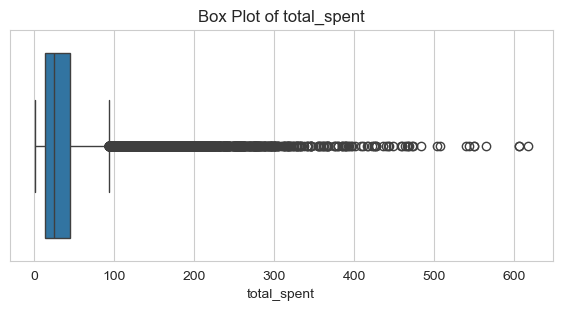

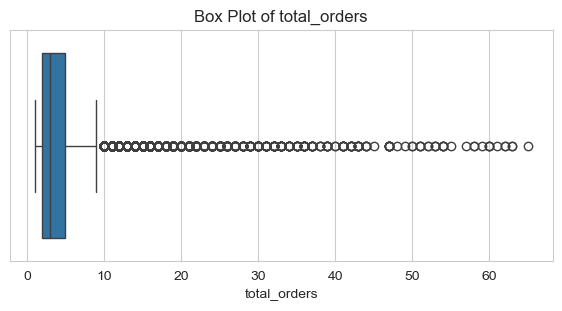

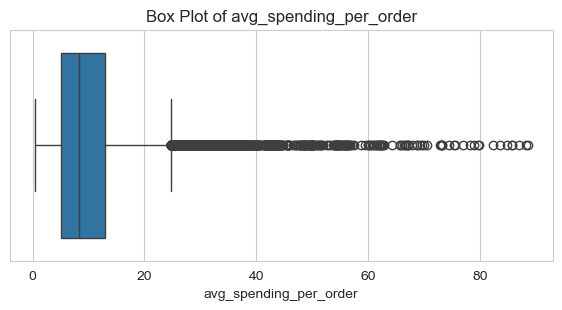

In [134]:
features_created = [
'total_spent',
'total_orders',
'avg_spending_per_order',
#'Order_frequency',
#'spending_intensity',
]


# Creating box plots for each metric feature
for feature in features_created:
    plt.figure(figsize=(7, 3))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()

In [51]:
#doesn´t make sense to remove outliers from spending_intensity and Order_frequency, since they are calculated based on the total_spent and total_orders, so we would be removing the same values.

df_new_outliers = df.copy()

# Remove Outliers by analyzing the boxplots for the metric features

new_filters = (
    (df_new_outliers['total_spent']<= 620)
    &
    (df_new_outliers['total_orders']<= 70) 
    &
    (df_new_outliers['avg_spending_per_order']<= 90)    
 
)

df_new_outliers = df_new_outliers[new_filters]
df=df_new_outliers.copy()

# We want to check the % of data Kept comparing with the original dataframe (df)
print('Percentage of data kept after removing outliers:', np.round(df_new_outliers.shape[0] / df.shape[0], 4), '%')

Percentage of data kept after removing outliers: 1.0 %


#### Considerations outliers

In total around 2% of the data was removed which is an acceptable value of data removed

## Let´s see some Visuals and other Relations bewteen the initial and new features:

### Define function below in order to don´t have the 2 clearest blue color in the palette due to the visuals aesthetics: <br>


In [52]:
# set back to white - cleaner
sns.set_style("white")

from matplotlib.colors import LinearSegmentedColormap

# Create a truncated version of the "Blues" colormap - we interact with copilot to determine this for us.
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = LinearSegmentedColormap.from_list(
        'truncated', cmap(np.linspace(minval, maxval, n)))
    return new_cmap

# Use the truncated colormap
blues = plt.get_cmap('Blues')
truncated_blues = truncate_colormap(blues, 0.3, 1.0)  # Adjust minval to exclude the whitest color

### Histogram of the Customer Region


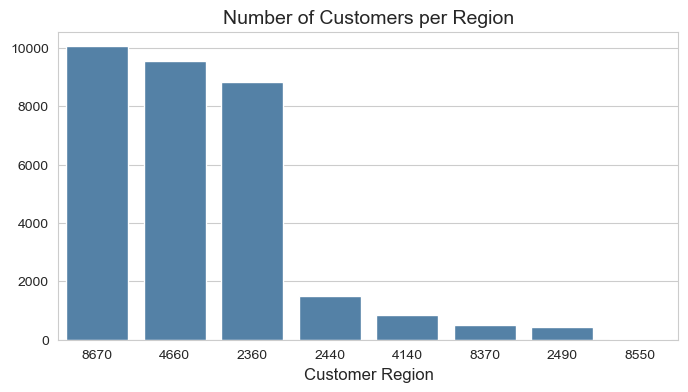

In [135]:
# Create a countplot for the customer_region column
plt.figure(figsize=(8, 4))
sns.countplot(x=df['customer_region'], order=df['customer_region'].value_counts(ascending=False).index, color='#4682B4')

# Add a title and labels
plt.title('Number of Customers per Region', fontsize=14)
plt.xlabel('Customer Region', fontsize=12)
plt.ylabel('', fontsize=12)

# Show the plot
plt.show() 

Helps us understand where the majority of our customers are located in terms of region. <br>
As we can see, we have 3 main regions where the majority of our customers are located. <br>
The other regions have a significantly lower count compared to the main regions. <br>
The region with the highest count is "8670" and the region with the lowest count is "8550". <br>

### Let´s see how the top 3 regions in number of customers behave regarding other features:
**Example: Relation with how many times those order from a chain restaurant:**

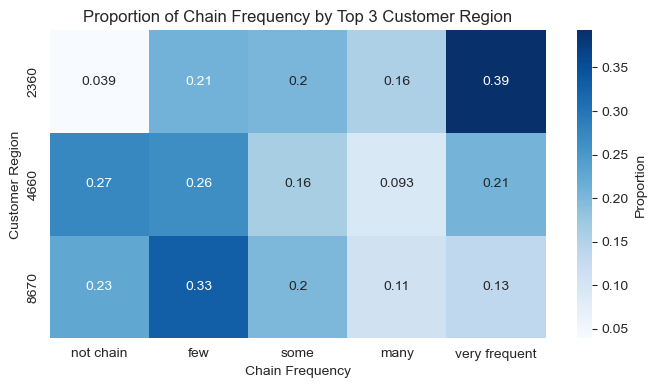

In [136]:
# Get top 3 regions and see proportion for each one of them regarding chain_frequency
top3_regions = df[df["customer_region"].isin(["8670", "4660", "2360"])]
top3_regions_by_chain = top3_regions.groupby(["customer_region"])[["chain_frequency"]].value_counts(normalize=True).unstack()

# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(top3_regions_by_chain, annot=True, cmap='Blues', cbar_kws={'label': 'Proportion'})
plt.title('Proportion of Chain Frequency by Top 3 Customer Region')
plt.ylabel('Customer Region')
plt.xlabel('Chain Frequency')
plt.show()


We see that region "2360" has the largest proportion in ordering too many times from a chain restaurant, this is a good indicator. <br>
On the other hand, "4660" and "8670" have around 50% of observations with none or few times order from a chain restaurant.

### Example for Total Spent in the top 3 regions in terms of customers:

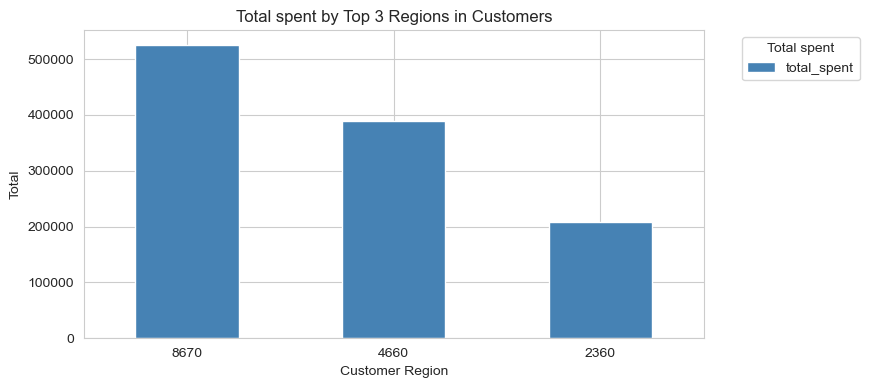

In [137]:
# Total spent for the top 3 regions in terms of customers.
total_spent_by_top3_regions = top3_regions.groupby(["customer_region"])[["total_spent"]].sum().sort_values(by="total_spent", ascending=False)

# structure plot.
total_spent_by_top3_regions.plot(kind='bar', stacked=False, figsize=(8, 4), color="#4682B4")
plt.title('Total spent by Top 3 Regions in Customers')
plt.ylabel('Total')
plt.xlabel('Customer Region')
plt.legend(title='Total spent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

`Conclusion`: Customers from "8670" are the ones who spent the most money, followed by "4660".

#### *Further ahead we have more visuals regarding each region with the rest of the features, so we will not continue just with these top3.*

### Customer Age vs Total Orders Placed:

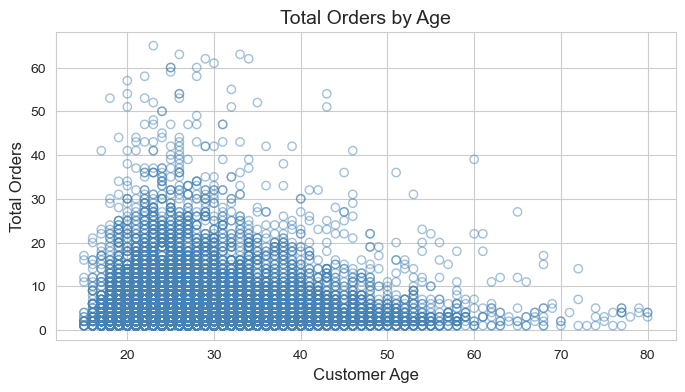

In [138]:
# Pair of Metric Variables Scatter Plot
plt.figure(figsize=(8, 4))
plt.scatter(df["customer_age"], df["total_orders"], 
            edgecolors="#4682B4",  # Draw the edges of each point
            alpha=.5,  # Change opacity level of each point
            color='none'  # Remove the fill color of each point
           )
# Title and labels
plt.title('Total Orders by Age', fontsize=14)
plt.xlabel("Customer Age", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)

plt.show()


The plot shows that the majority of customers are between 20 and 40 years old and have placed a total of 0 to 100 orders. <br>
There is a slight positive correlation between the age of the customer and the total number of orders placed, which means that younger customers tend to place more orders, however, the correlation is not very strong.

### Customer Age vs Total Spent:

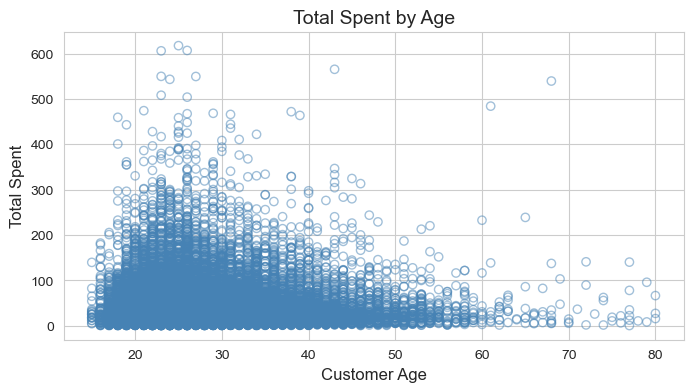

In [139]:
# Pair of Metric Variables Scatter Plot
plt.figure(figsize=(8, 4))
plt.scatter(df["customer_age"], df["total_spent"], 
            edgecolors="#4682B4", # Draw the edges of each point
            alpha=.5, # change opacity level of each point
 color='none' # remove the fill color of each point
           )
# title and labels
plt.title('Total Spent by Age',fontsize=14)
plt.xlabel("Customer Age",fontsize=12)
plt.ylabel("Total Spent",fontsize=12)

plt.show()

### Below we built some plots to inspect relationships between some numerical features, by each age group:

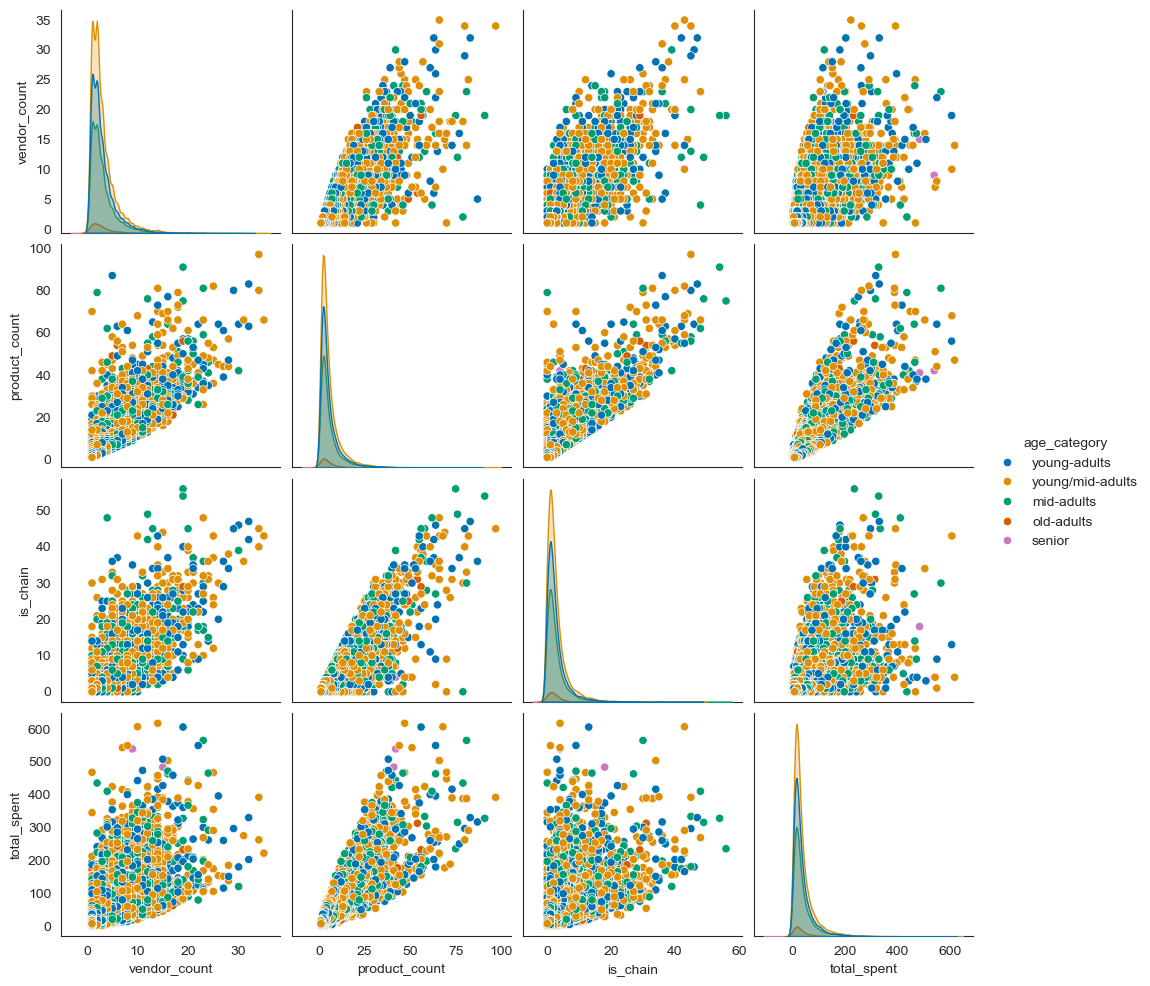

In [58]:
sns.pairplot(data=df, vars=["vendor_count", "product_count", "is_chain", "total_spent"], 
                                hue="age_category", height=2.5, diag_kind="kde", palette="colorblind")
plt.show()

### Mean spent by Age Category:

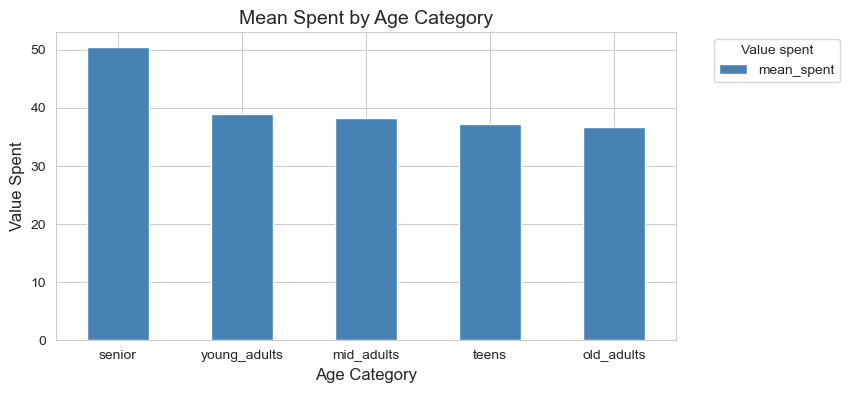

In [140]:
# mean spent by Age Category
median_spent_region = df.groupby("age_category")[["total_spent"]].mean() 
median_spent_region = median_spent_region.rename(columns={'total_spent': 'mean_spent'}) # rename column
median_spent_region = median_spent_region.sort_values(by="mean_spent", ascending=False) # sort by highest

# structure plot.
median_spent_region.plot(kind='bar', stacked=True, figsize=(8, 4), color="#4682B4")
plt.title('Mean Spent by Age Category', fontsize=14)
plt.ylabel('Value Spent', fontsize=12)
plt.xlabel('Age Category', fontsize=12)
plt.legend(title='Value spent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

### Let´s see how all age categories engage with the payment methods, chain frequency, last promotion and hours:

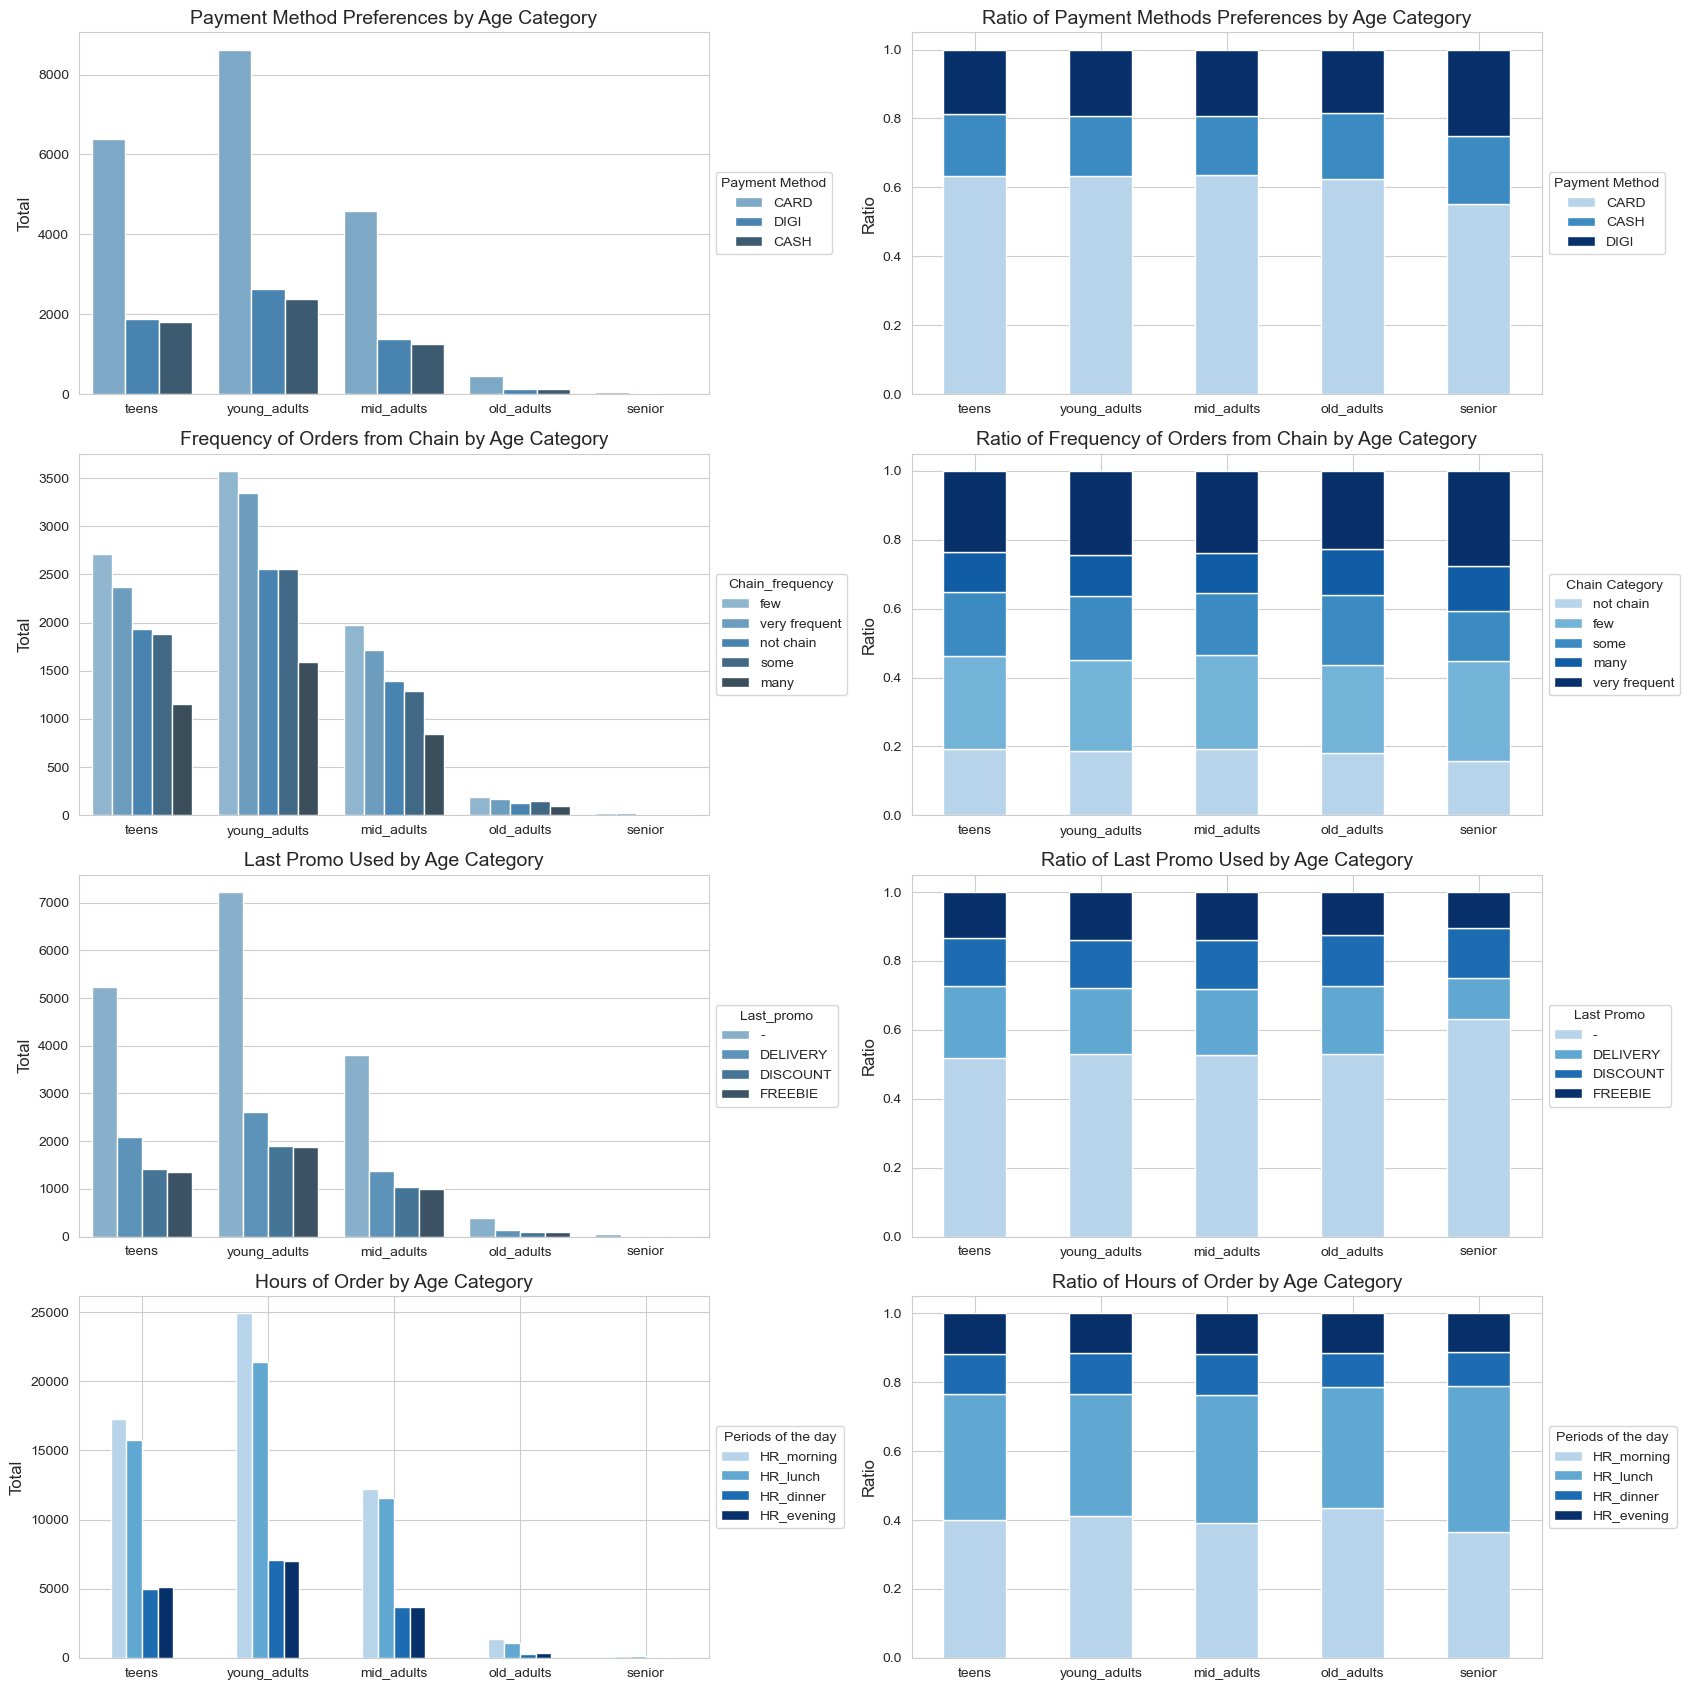

In [121]:
# Group and calculate proportions
pay_meth_age_cat = df.groupby("age_category")[["payment_method"]].value_counts(normalize=True).unstack()
chain_age_cat = df.groupby("age_category")["chain_frequency"].value_counts(normalize=True).unstack()
last_promo_age_cat = df.groupby("age_category")["last_promo"].value_counts(normalize=True).unstack()
HR_age_cat = df.groupby("age_category")[["HR_morning", "HR_lunch", "HR_dinner", "HR_evening"]].sum()
HR_age_cat_proportion = HR_age_cat.div(HR_age_cat.sum(axis=1), axis=0)
DOW_age_cat = df.groupby("age_category")[["Weekdays", "Weekend"]].sum()
DOW_age_cat_proportion = DOW_age_cat.div(DOW_age_cat.sum(axis=1), axis=0)

# Prepare figure. Create individual axes where each count plot will be placed
fig, ax = plt.subplots(4, 2, figsize=(17, 17))

# Plot data
# Payment Methods by Age Category
order = df['age_category'].value_counts(ascending=True).index
sns.countplot(data=df, x="age_category", hue="payment_method",hue_order= df["payment_method"].value_counts(ascending=False).index, palette="Blues_d", ax=ax[0,0])
ax[0,0].set_title("Payment Method Preferences by Age Category", fontsize=14)
ax[0,0].set_ylabel('Total', fontsize=12)
ax[0,0].set_xlabel('', fontsize=14)
ax[0,0].legend(title='Payment Method', loc='center left', bbox_to_anchor=(1.0, 0.5))

# Payment Methods by Age Category (Proportions)
pay_meth_age_cat.plot(kind='bar', stacked=True, colormap=truncated_blues, ax=ax[0,1])
ax[0,1].set_title('Ratio of Payment Methods Preferences by Age Category', fontsize=14)
ax[0,1].set_ylabel('Ratio', fontsize=12)
ax[0,1].set_xlabel('', fontsize=14)
ax[0,1].legend(title='Payment Method', loc='center left', bbox_to_anchor=(1.0, 0.5))
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=0)

# Chain Categories by Age Category
sns.countplot(data=df, x="age_category", hue="chain_frequency",hue_order= df["chain_frequency"].value_counts(ascending=False).index, palette="Blues_d", ax=ax[1,0])
ax[1,0].set_title('Frequency of Orders from Chain by Age Category', fontsize=14)
ax[1,0].set_ylabel('Total', fontsize=12)
ax[1,0].set_xlabel('', fontsize=14)
ax[1,0].legend(title='Chain_frequency', loc='center left', bbox_to_anchor=(1.0, 0.5))
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=0)

# Chain Categories by Age Category (Proportions)
chain_age_cat.plot(kind='bar', stacked=True, colormap=truncated_blues, ax=ax[1,1])
ax[1,1].set_title('Ratio of Frequency of Orders from Chain by Age Category', fontsize=14)
ax[1,1].set_ylabel('Ratio', fontsize=12)
ax[1,1].set_xlabel('', fontsize=14)
ax[1,1].legend(title='Chain Category', loc='center left', bbox_to_anchor=(1.0, 0.5))
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=0)

# Last Promo by Age Category
sns.countplot(data=df, x="age_category", hue="last_promo",hue_order= df["last_promo"].value_counts(ascending=False).index, palette="Blues_d", ax=ax[2,0])
ax[2,0].set_title('Last Promo Used by Age Category', fontsize=14)
ax[2,0].set_ylabel('Total', fontsize=12)
ax[2,0].set_xlabel('', fontsize=14)
ax[2,0].legend(title='Last_promo', loc='center left', bbox_to_anchor=(1.0, 0.5))
ax[2,0].set_xticklabels(ax[2,0].get_xticklabels(), rotation=0)

# Last Promo by Age Category (Proportions)
last_promo_age_cat.plot(kind='bar', stacked=True, colormap=truncated_blues, ax=ax[2,1])
ax[2,1].set_title('Ratio of Last Promo Used by Age Category', fontsize=14)
ax[2,1].set_ylabel('Ratio', fontsize=12)
ax[2,1].set_xlabel('', fontsize=14)
ax[2,1].legend(title='Last Promo', loc='center left', bbox_to_anchor=(1.0, 0.5))
ax[2,1].set_xticklabels(ax[2,1].get_xticklabels(), rotation=0)

# Time Slots by Age Category (Absolute Values)
HR_age_cat.plot(kind='bar', stacked=False, colormap=truncated_blues, ax=ax[3,0])
ax[3,0].set_title('Hours of Order by Age Category', fontsize=14)
ax[3,0].set_ylabel('Total', fontsize=12)
ax[3,0].set_xlabel('', fontsize=14)
ax[3,0].legend(title='Periods of the day', loc='center left', bbox_to_anchor=(1.0, 0.5))
ax[3,0].set_xticklabels(ax[3,0].get_xticklabels(), rotation=0)

# Time Slots by Age Category (Proportions)
HR_age_cat_proportion.plot(kind='bar', stacked=True, colormap=truncated_blues, ax=ax[3,1])
ax[3,1].set_title('Ratio of Hours of Order by Age Category', fontsize=14)
ax[3,1].set_ylabel('Ratio', fontsize=12)
ax[3,1].set_xlabel('', fontsize=14)
ax[3,1].legend(title='Periods of the day', loc='center left', bbox_to_anchor=(1.0, 0.5))
ax[3,1].set_xticklabels(ax[3,1].get_xticklabels(), rotation=0)

# Adjust the layout of the subplots
plt.tight_layout()

# Display the plot
plt.show()

As we can see by the ratios, per region, all variables behave in a very similar way. <br>
When we look at the absolute values that young-adults and mid-adults have a much higer count than the categories old-adults and senior, meaning that the majority of our customers are young-adults and mid-adults.

### Let´s see the proportion of age category of our customers in each customer region:

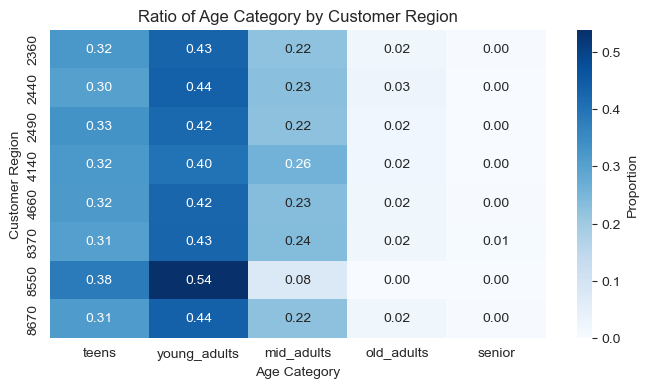

In [118]:
# Assuming 'region_age' is already calculated
region_age = df.groupby("customer_region")[["age_category"]].value_counts(normalize=True).unstack()

# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(region_age, annot=True, fmt='.2f' , cmap='Blues', cbar_kws={'label': 'Proportion'})
plt.title('Ratio of Age Category by Customer Region')
plt.ylabel('Customer Region')
plt.xlabel('Age Category')
plt.show()

Regions seem have a uniform distribution. 75% of teens and young_adults <br>
However, 8550 only has young_adults. Note: this region only has 13 customers...

### Inspect how customers last purchase method was based on each region:

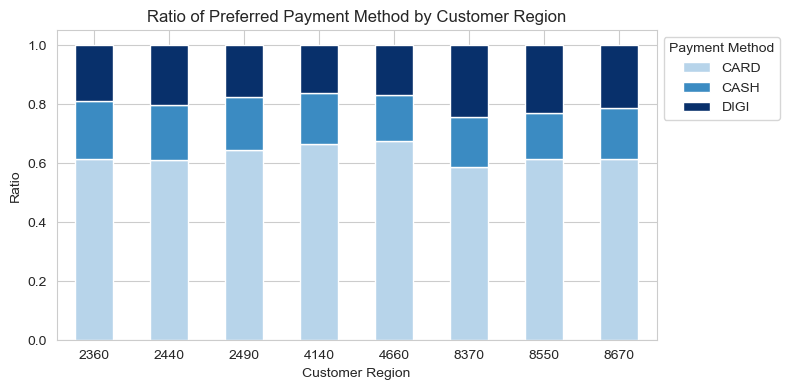

In [115]:
# First plot: Proportion of Payment Methods by Customer Region
payment_region = df.groupby("customer_region")[["payment_method"]].value_counts(normalize=True).unstack() # Calculate proportions of payment methods by customer region
payment_region.plot(kind='bar', stacked=True,  figsize=(8, 4), colormap=truncated_blues)
# Add title and labels
plt.title('Ratio of Preferred Payment Method by Customer Region')
plt.ylabel('Ratio')
plt.xlabel('Customer Region')
plt.legend(title='Payment Method', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()

Payment methods are very similar across all regions, with the majority of customers preferring to pay with a card. <br>
It is also tricky in the sense that it represents only the last payment made, not giving us a strong information about the customer´s preference overtime.

### Let´s see how customers order behavior troughout the week and weekend according to their age and region groups:

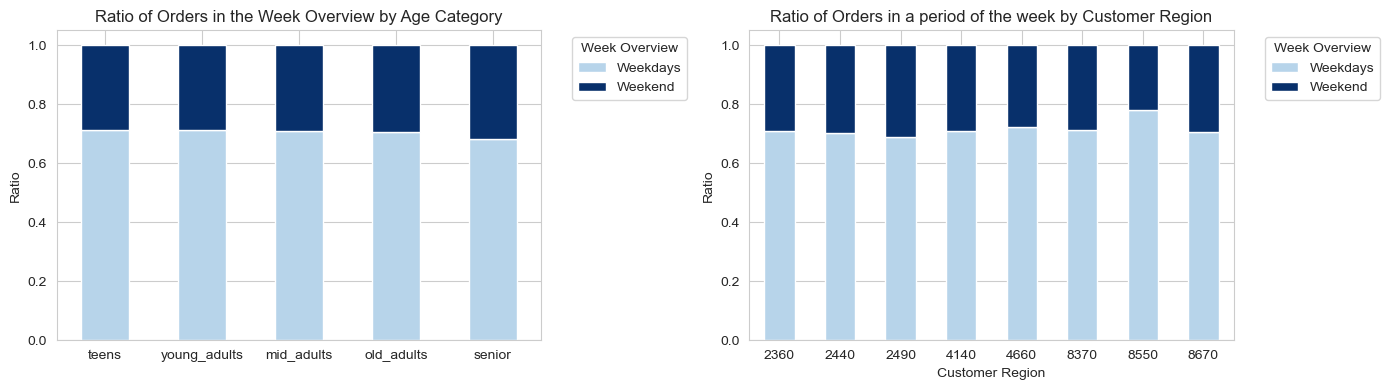

In [114]:
# Group by age_category and sum the orders for Weekdays and Weekend
DOW_age_cat = df.groupby("age_category")[["Weekdays", "Weekend"]].sum()
DOW_age_cat_proportion = DOW_age_cat.div(DOW_age_cat.sum(axis=1), axis=0)

# Group by customer_region and sum the orders for Weekdays and Weekend
orders_by_week_slot = df.groupby("customer_region")[["Weekdays", "Weekend"]].sum()
total_orders_by_week_slot = orders_by_week_slot.sum(axis=1) # get total orders for each region
proportion_orders_by_week_slot = orders_by_week_slot.div(total_orders_by_week_slot, axis=0) # we want proportion plot, so calculate proportion of orders on each period for all regions.

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Plot the first subplot
DOW_age_cat_proportion.plot(kind='bar', stacked=True, colormap=truncated_blues, ax=axes[0])
axes[0].set_title('Ratio of Orders in the Week Overview by Age Category')
axes[0].set_ylabel('Ratio')
axes[0].set_xlabel('')
axes[0].legend(title='Week Overview', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Plot the second subplot
proportion_orders_by_week_slot.plot(kind='bar', stacked=True, colormap=truncated_blues, ax=axes[1])
axes[1].set_title('Ratio of Orders in a period of the week by Customer Region')
axes[1].set_ylabel('Ratio')
axes[1].set_xlabel('Customer Region')
axes[1].legend(title='Week Overview', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()

All regions behave in a very similar way in terms of the week period that food is ordered, with an emphasis on weekdays, which makes sense since there are more days. <br>
All age categories have a similar distribution in the proportion of orders throughout the week, with the highest order volumes occurring on weekdays. <br>
However, orders among seniors show a slight decrease in volume over the week compared to other age groups.

### Let´s take a look at what regions customers belong:

In [64]:
df["customer_region"].value_counts()

customer_region
8670    9616
4660    9546
2360    8820
2440    1483
4140     857
8370     495
2490     445
-        442
8550      13
Name: count, dtype: int64

Noticed how regions are inbalanced, it´s better pratice to use central tendency measures in plots further ahead in order to don´t miss any indicators.

### What Cuisines each region prefer?

In [65]:
# initial groupby just to check.
df.loc[:, "CUI_American":"CUI_Thai"].groupby(df["customer_region"]).mean().round(2).style.format("{:.2f}").background_gradient(cmap="Blues")

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai
customer_region,,,,,,,,,,,,,,,
-,5.87,21.62,4.84,0.00,0.00,0.85,2.23,0.88,0.00,0.00,3.54,0.00,0.03,10.42,0.00
2360,2.00,1.88,2.15,0.25,2.05,2.57,0.40,0.46,1.95,0.76,1.73,2.11,3.97,0.34,0.75
2440,1.98,2.17,2.01,0.29,1.85,2.40,0.52,0.32,1.32,0.59,1.20,2.20,4.05,0.45,0.51
2490,1.80,1.18,2.29,0.17,2.77,1.85,0.24,0.27,0.90,0.53,1.15,1.32,3.94,0.58,0.62
4140,4.35,1.40,0.00,0.38,0.17,0.22,0.00,0.31,2.07,13.85,1.26,0.00,2.69,1.78,0.91
4660,7.37,5.48,0.00,2.34,0.24,0.55,0.00,1.41,3.21,8.72,4.02,0.00,5.10,0.48,1.91
8370,4.15,19.78,3.31,0.00,0.00,1.00,2.56,0.79,0.00,0.00,1.65,0.00,0.00,10.10,0.00
8550,12.81,22.58,8.21,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.40,0.00,0.00,10.93,0.00
8670,5.67,22.98,4.75,0.00,0.00,1.17,2.22,1.13,0.00,0.00,3.61,0.00,0.10,10.81,0.00


We see that region 4660 overall spents a lot, however in CUI_Beverages and Noodle Dishes has 0.0 spent. <br>
Let´s trying to understand also what region behaves identical to unknown region.

### For better visualisation we select just the regions that appear more identical to the unknown one:

In [66]:
# filter the DataFrame to include only the specified regions
filtered_df_by_regions = df[df["customer_region"].isin(["-", "8370", "8550", "8670"])]

# apply the operations on the filtered DataFrame
filtered_df_by_regions.loc[:, "CUI_American":"CUI_Thai"].groupby(filtered_df_by_regions["customer_region"]).mean().round(2).style.format("{:.2f}").background_gradient(cmap="Blues")

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai
customer_region,,,,,,,,,,,,,,,
-,5.87,21.62,4.84,0.00,0.00,0.85,2.23,0.88,0.00,0.00,3.54,0.00,0.03,10.42,0.00
8370,4.15,19.78,3.31,0.00,0.00,1.00,2.56,0.79,0.00,0.00,1.65,0.00,0.00,10.10,0.00
8550,12.81,22.58,8.21,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.40,0.00,0.00,10.93,0.00
8670,5.67,22.98,4.75,0.00,0.00,1.17,2.22,1.13,0.00,0.00,3.61,0.00,0.10,10.81,0.00


These 3 regions are very identical in terms of what they do or do not eat comparing with the Unknown one. <br>
So it´s very likely that when we use our model to predict those missing values, they belong from one of those 3.

### Below we can look at each region and see what day of the week they order the most:

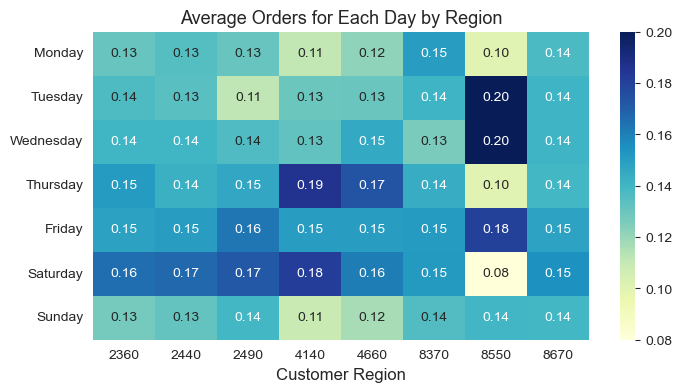

In [122]:
# df group by region, get average of each day of the week:
week_orders_by_region = df.groupby("customer_region")[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]].mean().T

# total by region is 1 for each day of week, in order to get desired output.
week_orders_by_region = week_orders_by_region.div(week_orders_by_region.sum(axis=0), axis=1)

# structure plot
plt.figure(figsize=(8, 4))
sns.heatmap(week_orders_by_region, cmap='YlGnBu', annot=True, fmt='.2f')
plt.xlabel('Customer Region', fontsize=12)
plt.ylabel('')
plt.title('Average Orders for Each Day by Region', fontsize=13)
plt.show()

In general, the majority of regions tend to order most on saturday. <br>
However in "4140", "4660" and "8550" the highest region is mostly during weekdays between tuesday and thursday.

### Below, we can see a correlation matrix of the customer purchase history:

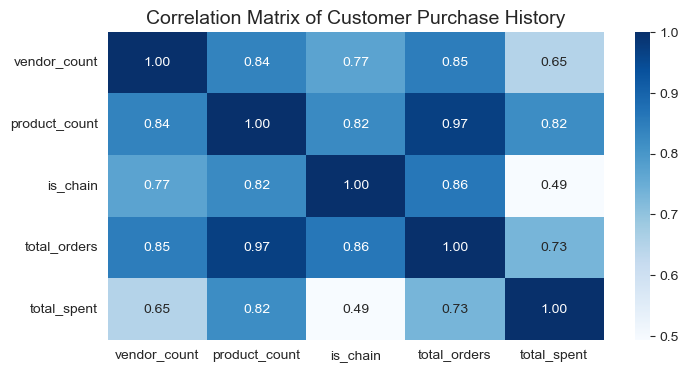

In [123]:
# Select the relevant columns
customer_info = df[['vendor_count', 'product_count',
       'is_chain', 'total_orders', 'total_spent']]

# Calculate the correlation matrix
correlation_matrix = customer_info.corr()

# structure plot
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix of Customer Purchase History', fontsize=14)
plt.show()

The heatmap shows the correlation between the different variables in the dataset. <br>
Some variables have really high correlation, like product_count and total_orders, which makes sense since the more products a customer buys, the more orders he will have. <br>
This heatmap gives us valuable information about the dataset, and we can see that the variables are not completely independent from each other, which is important for the next steps in the analysis

### Let´s take a look at total and median spent per region:

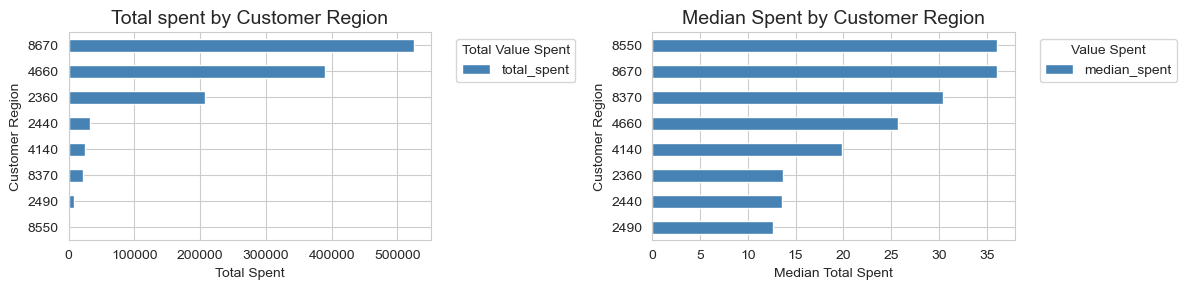

In [127]:
# Group by customer_region and calculate the total spent
total_spent_region = df.groupby("customer_region")[["total_spent"]].sum()
total_spent_region = total_spent_region.rename(columns={'total_spent': 'total_spent'})
total_spent_region = total_spent_region.sort_values(by="total_spent", ascending=True)

# Group by customer_region and calculate the median spent
median_spent_region = df.groupby("customer_region")[["total_spent"]].median()
median_spent_region = median_spent_region.rename(columns={'total_spent': 'median_spent'})
median_spent_region = median_spent_region.sort_values(by="median_spent", ascending=True)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
# Plot the total spent
total_spent_region.plot(kind='barh', stacked=True, color="#4682B4", ax=axes[0])
axes[0].set_title('Total spent by Customer Region', fontsize=14)
axes[0].set_xlabel('Total Spent')
axes[0].set_ylabel('Customer Region')
axes[0].legend(title='Total Value Spent', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot the median spent
median_spent_region.plot(kind='barh', stacked=True, color="#4682B4", ax=axes[1])
axes[1].set_title('Median Spent by Customer Region', fontsize=14)
axes[1].set_xlabel('Median Total Spent')
axes[1].set_ylabel('Customer Region')
axes[1].legend(title='Value Spent', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()

The bar plot shows the total amount spent by customers in each region. <br>
Region 8670 has the highest total amount spent, and region 8550 has the lowest.

Region "8550" is the region with highest median compared to other regions, however they have the lowest total spending due to their low number of customers in the region.

### Let´s take a look at Total Orders per Age Categories:

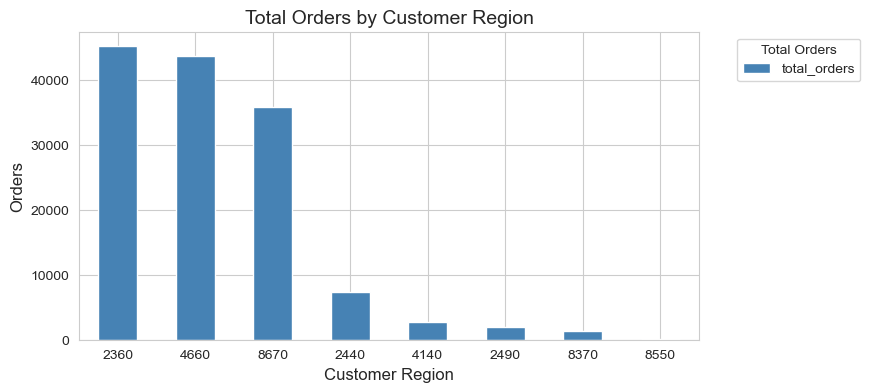

In [110]:

# Group by customer_region and calculate the total orders for each region
total_orders_region = df.groupby("customer_region")[["total_orders"]].sum()
total_orders_region = total_orders_region.rename(columns={'total_orders': 'total_orders'})
total_orders_region = total_orders_region.sort_values(by="total_orders", ascending=False)

# structure plot.
total_orders_region.plot(kind='bar', stacked=True, figsize=(8, 4), color="#4682B4")
plt.title('Total Orders by Customer Region', fontsize=14)
plt.ylabel('Orders', fontsize=12)
plt.xlabel('Customer Region', fontsize=12)
plt.legend(title='Total Orders', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

### The plot below shows the average value spent by age category in each customer region:

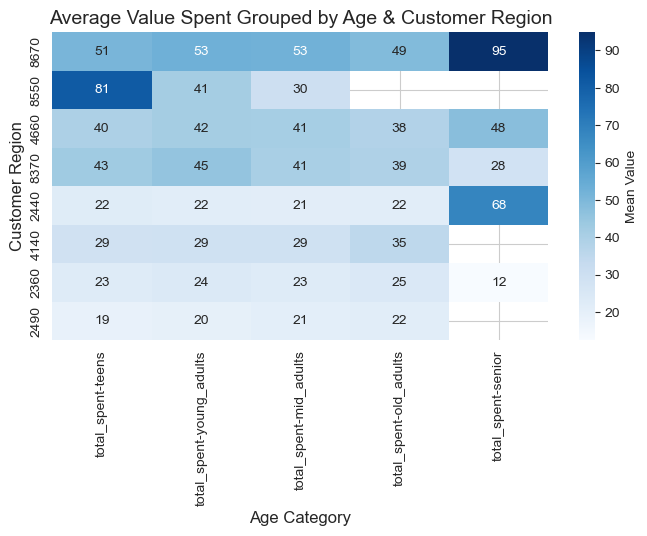

In [128]:
average_spent_region_age = df.groupby(["customer_region", "age_category"])[["total_spent"]].mean().unstack()

# Sort the DataFrame by the total spent mean in descending order
average_sort = average_spent_region_age.mean(axis=1).sort_values(ascending=False).index
average_spent_region_age = average_spent_region_age.loc[average_sort]

# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(average_spent_region_age, annot=True, cmap='Blues', cbar_kws={'label': 'Mean Value'})
plt.title('Average Value Spent Grouped by Age & Customer Region', fontsize=14)
plt.ylabel('Customer Region', fontsize=12)
plt.xlabel('Age Category', fontsize=12)
plt.show()

We can see that "4660" and "8670" have a huge average spent regarding senior people <br>
"8370" and "2440", "4140", "2490" and "2360" has uniform values across 3 age first age groups (youngest ones)

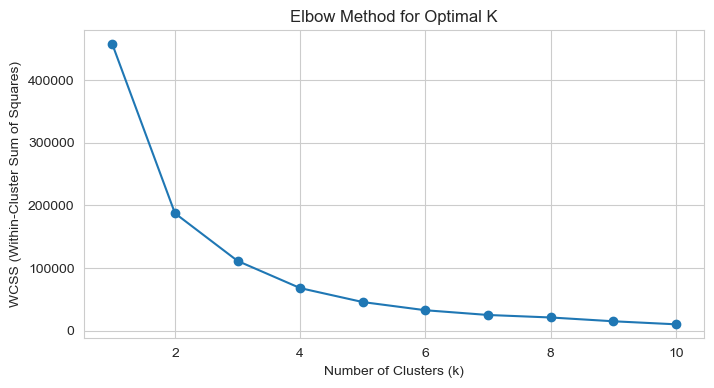

In [141]:
# Elbow Method for training set
wcss_train = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df[["is_chain"]])  # Reshape to 2D array
    wcss_train.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss_train, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [73]:
# Instantiate and fit the KMeans model
#kmeans = KMeans(n_clusters=3, random_state=42).fit(df[["is_chain"]])

# Predict the age groups for the training, validation, and test sets
#df['chain_group'] = kmeans.predict(df[['is_chain']])


In [74]:
# Calcular as estatísticas de cada cluster para verificar os grupos etários
#cluster_df_chain = df.groupby('chain_group')['is_chain'].agg(['min', 'max', 'mean', 'median', 'count'])


# Exibir os resultados de forma clara
#print("Cluster Chain Group Ranges:")
#for cluster, stats in cluster_df_chain.iterrows():
#    print(f"\nCluster {cluster}:")
#    print(f" - Min Chain: {stats['min']}")
#    print(f" - Max Chain: {stats['max']}")
#    print(f" - Mean Chain: {stats['mean']:.1f}")
#    print(f" - Median Chain: {stats['median']}")
#    print(f" - Count: {stats['count']}")



## Fill missing values in customer_region

Features being used for clustering:
Index(['Asian_Cuisine', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'Complementary_Cuisine', 'Friday', 'HR_0', 'HR_1', 'HR_10',
       'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_2', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'HR_3', 'HR_4',
       'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'Monday', 'Other_Cuisines',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Western_Cuisine', 'avg_spending_per_order', 'chain_order_ratio',
       'customer_age', 'first_order', 'is_chain', 'last_order', 'last_promo',
       'payment_method', 'product_count', 'total_orders', 'total_spent',
       'vendor_count'],
      dtype='object')
Checking for missing or infinite values...

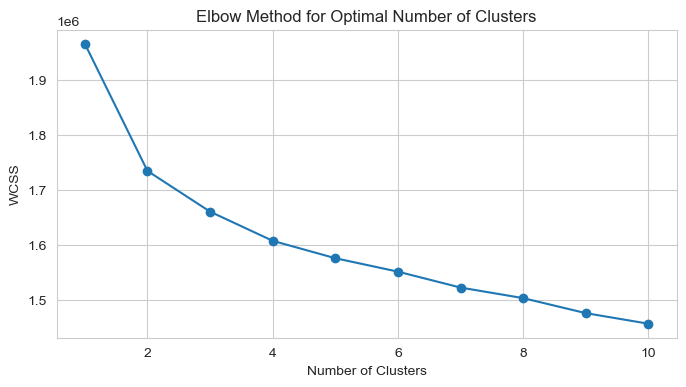

cluster
0    8670
1    8670
2    2360
Name: customer_region, dtype: object
Before imputation:
customer_region
8670    10053
4660     9546
2360     8825
2440     1483
4140      857
8370      495
2490      445
8550       13
Name: count, dtype: int64
After imputation:
customer_region
8670    10053
4660     9546
2360     8825
2440     1483
4140      857
8370      495
2490      445
8550       13
Name: count, dtype: int64
            customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
1b8f824d5e             2360          18.0             2              5   
5d272b9dcb             8670          17.0             2              2   
f6d1b2ba63             4660          38.0             1              2   
180c632ed8             4660          26.0             2              3   
4eb37a6705             4660          20.0             2              5   

             is_chain  first_order  last_order  last_promo  p

In [142]:
# Load the dataset
df_region = df.copy()

# Replace "-" with NaN in the customer_region column
df_region['customer_region'] = df_region['customer_region'].replace("-", pd.NA)

# Encode categorical features
label_encoders = {}
categorical_features = df_region.select_dtypes(include=['object']).columns.difference(['customer_region'])
for col in categorical_features:
    le = LabelEncoder()
    df_region[col] = le.fit_transform(df_region[col])
    label_encoders[col] = le

# Select relevant features for clustering (excluding customer_region)
redundant_features = ["HR_evening","HR_dinner","HR_morning","HR_lunch","age_category","chain_frequency","preferred_cui_type","Weekdays","Weekend"]  # Add any other redundant features here
features = df_region.columns.difference(['customer_region'] + redundant_features)
df_region_features = df_region[features]

# Print the list of features being used for clustering
print("Features being used for clustering:")
print(features)

# Check for missing or infinite values
print("Checking for missing or infinite values...")
print(df_region_features.isnull().sum())
print(np.isinf(df_region_features).sum())

# Handle missing or infinite values
df_region_features = df_region_features.replace([np.inf, -np.inf], np.nan)
df_region_features = df_region_features.dropna()

# Ensure df_region has the same rows as df_region_features
df_region = df_region.loc[df_region_features.index]

# Scale the features
scaler = StandardScaler()
df_region_features_scaled = scaler.fit_transform(df_region_features)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_region_features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Fit the KMeans model with the optimal number of clusters (e.g., 3)
optimal_clusters = 3  # Replace with the optimal number of clusters determined from the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_region['cluster'] = kmeans.fit_predict(df_region_features_scaled)

# Analyze the clusters
print(df_region.groupby('cluster')['customer_region'].apply(lambda x: x.mode().iloc[0]))

# Impute missing customer_region values based on the cluster mode
def impute_customer_region(row):
    if pd.isna(row['customer_region']):
        return df_region[df_region['cluster'] == row['cluster']]['customer_region'].mode().iloc[0]
    else:
        return row['customer_region']

# Check the unique values and counts before imputation
print("Before imputation:")
print(df_region['customer_region'].value_counts(dropna=False))

# Apply the imputation function
df_region['customer_region'] = df_region.apply(impute_customer_region, axis=1)

# Check the unique values and counts after imputation
print("After imputation:")
print(df_region['customer_region'].value_counts(dropna=False))

# Drop the cluster column as it's no longer needed
df_region = df_region.drop(columns=['cluster'])

# Display the first few rows of the updated DataFrame
print(df_region.head())

In [76]:
missing_values = df_region['customer_region'].isna().sum()
print(f"Missing values in 'customer_region' after imputation: {missing_values}")

Missing values in 'customer_region' after imputation: 0


In [77]:
# Replace the customer_region column in df with the customer_region column from df_region
df['customer_region'] = df_region['customer_region']

In [78]:
# save in new csv data without missing values and preprocess. 

df.to_csv('data_preprocessed.csv')

# For the next notebooks we will scale the data and see the models and perspetives for clusters.